<h1 style="color:red"> Table of Content </h1> 

1. [Load Data](#1)
2. [Preprocessing Data](#2)
3. [Data Visualization](#4)
  
4. [Correlation between the variables](#4)
5. [Simple Linear Regression](#6)
6. [Multiple Linear Regression](#6)
7. [Save Model](#7)


# Packages Loading

In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors

# For Statistics 
from scipy.stats import pearsonr
## For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_error,root_mean_squared_error
from sklearn.preprocessing import LabelEncoder
## For to save the model 
import joblib

# Load Data

In [5]:
path_data = "../data/simulations.json"
path_to_save_model = "../models/regressor_model.jolib"

In [6]:
# Open and read the JSON file
with open(path_data, 'r') as file:
    data = json.load(file)

# Print the data


# Preprocessing Data

In [7]:
def preprocessing_data(data, key_value):
    list_impacts_all = []
    list_values = []
    keys_values = []
    for element in range(0,len(data)): 
        list_impacts_all.append(data[element][key_value].values())
        ## Convert the values
    for element in range(0, len(list_impacts_all)):
        list_values.append(list(list_impacts_all[element]))
    ## get the keys values
    keys_values = data[element][key_value].keys()
    keys_values = [i for i in list(keys_values)]
    # Create a dataframe
    dataset = pd.DataFrame(list_values, columns=keys_values)
    return dataset
    

# Call Function

In [8]:
data_impact = preprocessing_data(data = data, 
                           key_value="impacts")

data_query =preprocessing_data(data = data, 
                           key_value="query")
## drop columns 
data_query = data_query.drop("materials", axis = 1)


In [9]:
display(data_impact.head())

,acd,cch,etf,etf-c,fru,fwe,htc,htc-c,htn,htn-c,...,ldu,mru,ozd,pco,pma,swe,tre,wtu,ecs,pef
0,0.145715,24.225602,111.592737,334.199095,277.585711,0.009846,5.867200e-09,5.989049e-09,5.709880e-08,1.634443e-08,...,86.752954,0.000144,0.000097,0.081416,1.394706e-06,0.039532,0.320176,4.243234,3371.593189,2358.028274
1,0.021158,2.742027,7.873200,28.652949,38.099181,0.000602,3.808876e-10,5.142960e-10,-4.045859e-09,2.167908e-09,...,28.080156,0.000008,0.000004,0.006964,1.466012e-07,0.004409,0.063131,0.542432,306.325709,265.634710
2,0.181251,20.854182,91.044543,148.524567,275.628472,0.005375,4.445490e-09,4.194632e-09,-1.779762e-08,1.722111e-08,...,251.177342,0.000108,0.000070,0.068738,1.328663e-06,0.044227,0.609810,6.954623,2898.766484,2234.862138
3,0.305665,32.175170,109.146844,326.550263,336.232881,0.013855,3.103660e-09,4.361955e-09,-2.871498e-08,2.796910e-08,...,358.367293,0.000122,0.000069,0.096103,1.678575e-06,0.063120,0.747905,12.687058,3719.728891,3117.741446
4,0.094097,12.514815,56.131237,194.582163,180.923177,0.006252,3.177364e-09,3.089848e-09,-1.510065e-08,1.185648e-08,...,159.553570,0.000042,0.000021,0.033266,7.033344e-07,0.024353,0.281117,4.962141,1603.374028,1323.197677


# Merge data

In [10]:
dataset = pd.concat([data_impact, data_query], axis=1)

In [11]:
dataset.head()

,acd,cch,etf,etf-c,fru,fwe,htc,htc-c,htn,htn-c,...,makingWaste,mass,numberOfReferences,physicalDurability,price,product,surfaceMass,traceability,upcycled,yarnSize
0,0.145715,24.225602,111.592737,334.199095,277.585711,0.009846,5.867200e-09,5.989049e-09,5.709880e-08,1.634443e-08,...,0.29,0.55,951231,0.92,166.86,pull,170,True,False,59.71
1,0.021158,2.742027,7.873200,28.652949,38.099181,0.000602,3.808876e-10,5.142960e-10,-4.045859e-09,2.167908e-09,...,0.17,0.03,931413,0.95,585.15,slip,207,True,False,186.78
2,0.181251,20.854182,91.044543,148.524567,275.628472,0.005375,4.445490e-09,4.194632e-09,-1.779762e-08,1.722111e-08,...,0.22,0.45,584825,0.76,731.64,jean,253,False,False,133.62
3,0.305665,32.175170,109.146844,326.550263,336.232881,0.013855,3.103660e-09,4.361955e-09,-2.871498e-08,2.796910e-08,...,0.09,0.55,472254,1.09,586.63,pull,381,False,False,146.70
4,0.094097,12.514815,56.131237,194.582163,180.923177,0.006252,3.177364e-09,3.089848e-09,-1.510065e-08,1.185648e-08,...,0.34,0.15,522324,1.1,679.01,tshirt,460,True,False,168.66


# Concatenat Data

In [12]:
data_all = pd.concat([pd.DataFrame(data_impact["pef"]), data_query], axis=1)

In [13]:
data_all.head()

,pef,airTransportRatio,business,countryDyeing,countryFabric,countryMaking,countrySpinning,fabricProcess,makingComplexity,makingDeadStock,makingWaste,mass,numberOfReferences,physicalDurability,price,product,surfaceMass,traceability,upcycled,yarnSize
0,2358.028274,0.94,large-business-with-services,CN,REO,CN,KH,knitting-integral,very-low,0.22,0.29,0.55,951231,0.92,166.86,pull,170,True,False,59.71
1,265.634710,0.34,large-business-with-services,RNA,VN,BD,MM,knitting-integral,high,0.07,0.17,0.03,931413,0.95,585.15,slip,207,True,False,186.78
2,2234.862138,0.87,large-business-with-services,FR,CN,RNA,RLA,knitting-fully-fashioned,medium,0.05,0.22,0.45,584825,0.76,731.64,jean,253,False,False,133.62
3,3117.741446,0.51,large-business-with-services,RLA,MA,RME,TR,weaving,medium,0.21,0.09,0.55,472254,1.09,586.63,pull,381,False,False,146.70
4,1323.197677,0.14,large-business-without-services,BD,RME,PK,REE,weaving,low,0.1,0.34,0.15,522324,1.1,679.01,tshirt,460,True,False,168.66


# Cleaning Data

In [14]:
# Clearn data
product = data_all["product"].unique()
vraie_value = [element for element in product if isinstance(element, str)]
data_all = data_all.loc[data_all["product"].isin(vraie_value)]
# Convert all columns 
data_all = data_all.convert_dtypes()  
# remove the ordinal variable 
data_all = data_all.drop("numberOfReferences", axis = 1)

In [15]:
data_all.head()

,pef,airTransportRatio,business,countryDyeing,countryFabric,countryMaking,countrySpinning,fabricProcess,makingComplexity,makingDeadStock,makingWaste,mass,physicalDurability,price,product,surfaceMass,traceability,upcycled,yarnSize
0,2358.028274,0.94,large-business-with-services,CN,REO,CN,KH,knitting-integral,very-low,0.22,0.29,0.55,0.92,166.86,pull,170,True,False,59.71
1,265.63471,0.34,large-business-with-services,RNA,VN,BD,MM,knitting-integral,high,0.07,0.17,0.03,0.95,585.15,slip,207,True,False,186.78
2,2234.862138,0.87,large-business-with-services,FR,CN,RNA,RLA,knitting-fully-fashioned,medium,0.05,0.22,0.45,0.76,731.64,jean,253,False,False,133.62
3,3117.741446,0.51,large-business-with-services,RLA,MA,RME,TR,weaving,medium,0.21,0.09,0.55,1.09,586.63,pull,381,False,False,146.7
4,1323.197677,0.14,large-business-without-services,BD,RME,PK,REE,weaving,low,0.1,0.34,0.15,1.1,679.01,tshirt,460,True,False,168.66


# Data Visualization

In [16]:
## Function to visualize the histogramm
def histogramm_visualization (data):
    """
    This function displays histograms of all variables in the data.
    """
    fig = plt.figure(figsize=(25,20))
    st = fig.suptitle("Distribution of Features", fontsize =50, verticalalignment = "center")
    for col, num in zip(data.columns, range(1,11)): 
        ax = fig.add_subplot(3,4,num)
        ax.hist(data[col])
        plt.grid(False)
        plt.xticks(rotation = 45, fontsize = 20)
        plt.yticks(fontsize = 15)
        plt.title(col.upper(), fontsize = 15, color = "red")
    plt.tight_layout()
    st.set_y(0.95)
    fig.subplots_adjust(top = 0.85, hspace = 0.4)
    plt.show()
# Distribution visulaization 
def distribution_visualization (data):
    """
    This function displays histograms of all variables in the data.
    """
    fig = plt.figure(figsize=(25,20))
    st = fig.suptitle("Distribution of Features", fontsize =50, verticalalignment = "center")
    for col, num in zip(data.columns, range(1,11)): 
        ax = fig.add_subplot(3,4,num)
        ax.hist(data[col], density=1, color = "green", alpha = 0.7)
        plt.grid(False)
        plt.xticks(rotation = 45, fontsize = 20)
        plt.yticks(fontsize = 15)
        plt.title(col.upper(), fontsize = 15, color = "red")
    plt.tight_layout()
    st.set_y(0.95)
    fig.subplots_adjust(top = 0.85, hspace = 0.4)
    plt.show()


# Select a float columns

In [17]:
dataset_float = data_all.select_dtypes("float64")
dataset_float.head()

,pef,airTransportRatio,makingDeadStock,makingWaste,mass,physicalDurability,price,yarnSize
0,2358.028274,0.94,0.22,0.29,0.55,0.92,166.86,59.71
1,265.63471,0.34,0.07,0.17,0.03,0.95,585.15,186.78
2,2234.862138,0.87,0.05,0.22,0.45,0.76,731.64,133.62
3,3117.741446,0.51,0.21,0.09,0.55,1.09,586.63,146.7
4,1323.197677,0.14,0.1,0.34,0.15,1.1,679.01,168.66


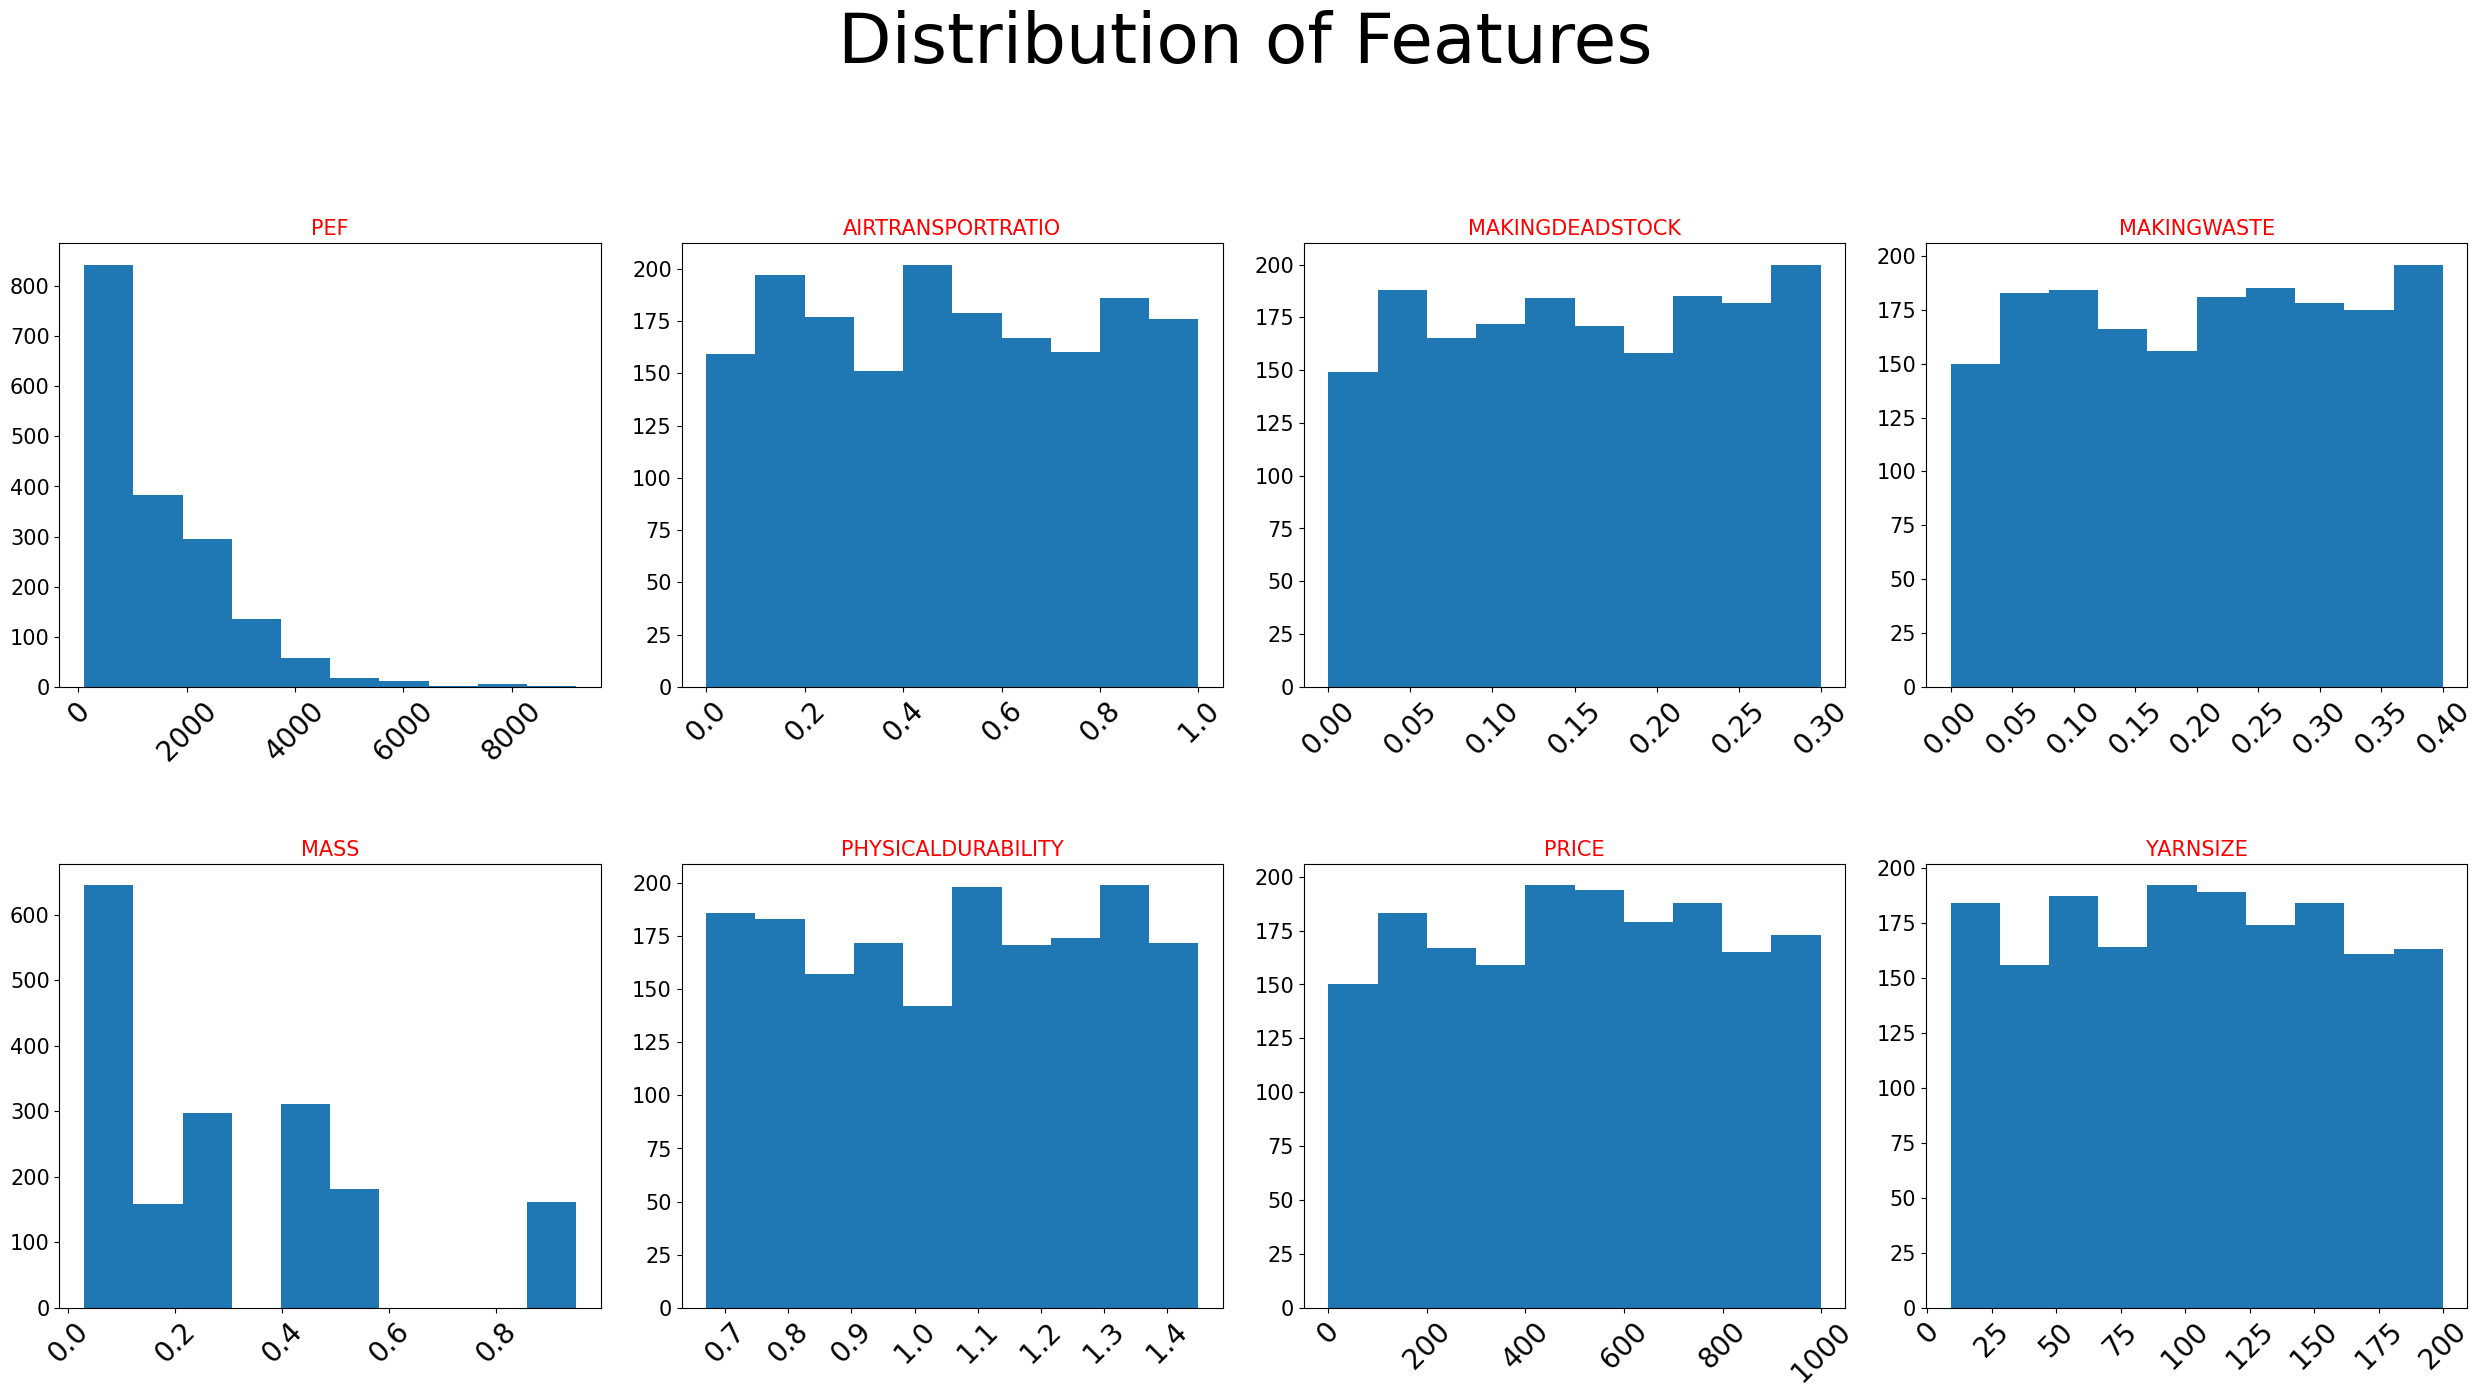

In [19]:
histogramm_visualization(dataset_float)

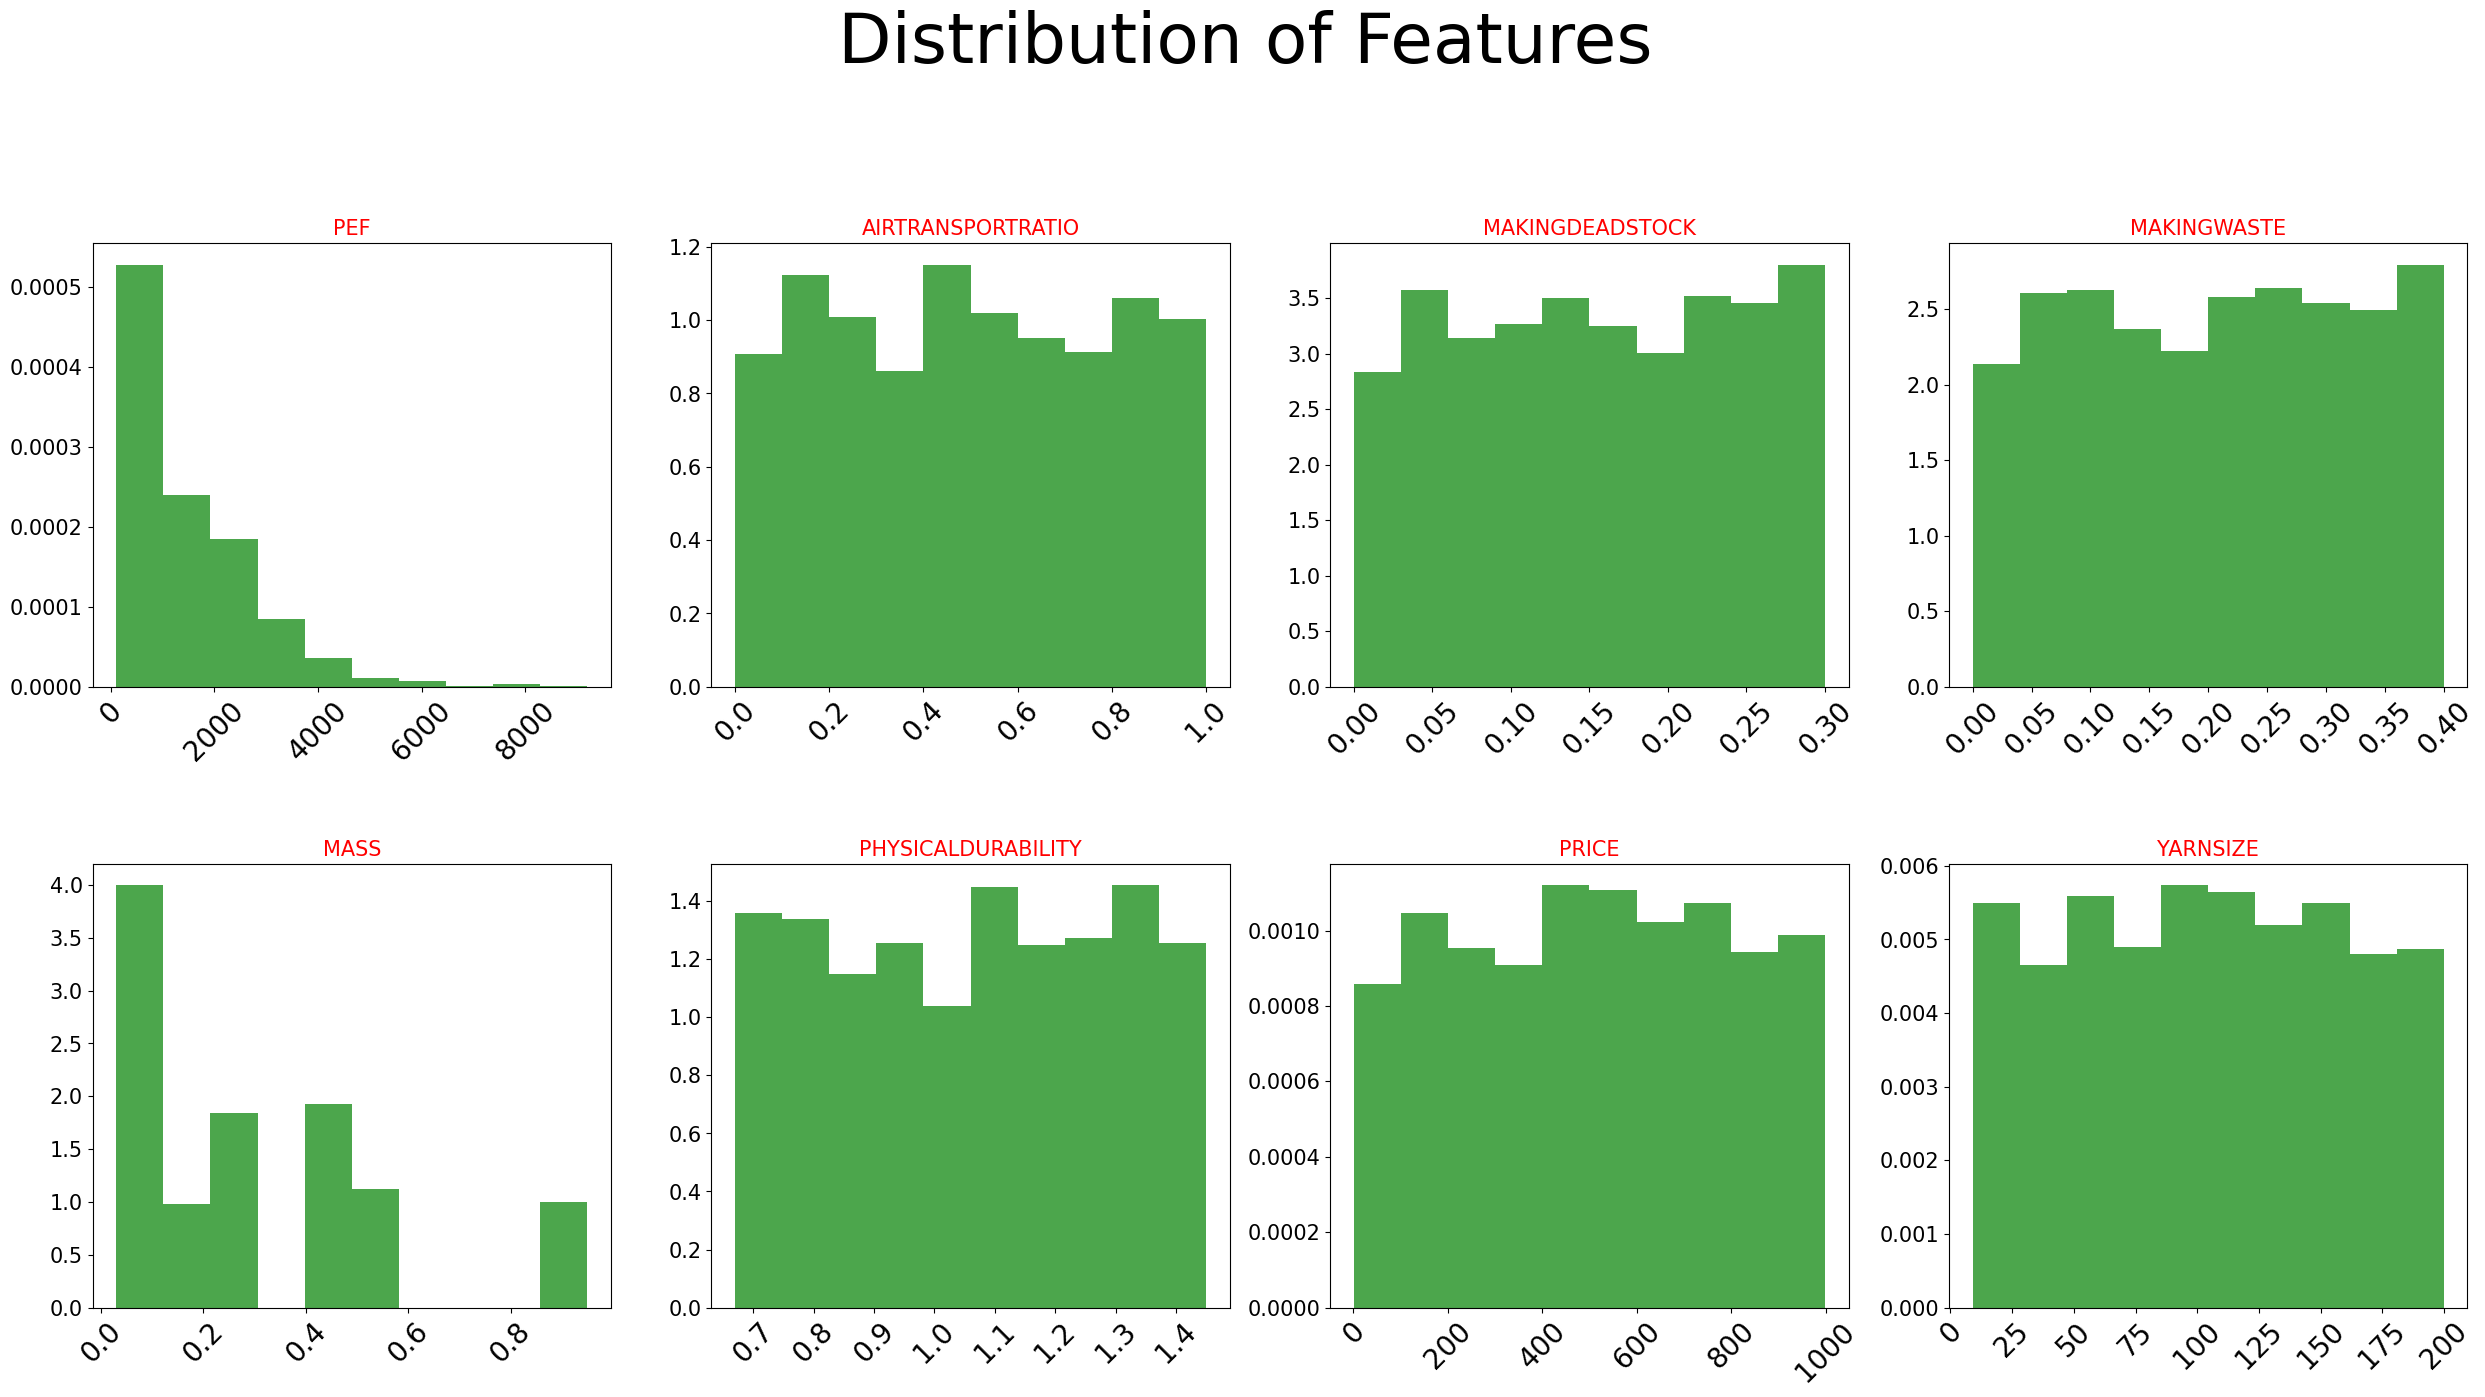

In [400]:
distribution_visualization(dataset_float)

# Visualization of Categorial Variable 

In [20]:
## Create a label color for earch category 
def label_colour (Name, palette):
    """
    Create the color for earch category
    """
    dict_colour = {}
    for i in range(len(Name)):
        dict_colour[Name[i]] = palette[i]
    return dict_colour
    
# Visualize the categorial variable per barplot and pie chart
def Visualizing_Categorical_Variable(data, col, size, name_of_color): 
    """
    This function displays cathegory variables in barplot and Pie chart form. 
    """
    values = data[col].value_counts().values
    labels = data[col].value_counts().index

    products_values = data_all["product"].value_counts().index.to_list()
    ## Fixe random seed 
    random.seed(10)
    #colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(labels))
    colors = sns.color_palette(name_of_color, len(labels)).as_hex()
    ## Call function and create palette colors 
    palette_colors = label_colour(labels, colors)

    # Les modalités
    # Name of modality 
    plt.figure(figsize=size)
    plt.suptitle(f"Distribution of {col}", fontsize =50, verticalalignment = "center")
    
    ## barplot 
    plt.subplot(2,2,1)
    plt.bar(labels,values, color = colors)
    for index, value in enumerate(values): 
        plt.text(x = index, y = value+0.02, s = f"{value}", fontdict=dict(fontsize=15), color = "blue")
    plt.title("Barplot Visualization")
    ## Pie plot 
    plt.subplot(2,2,2)
    plt.title(f"Pie chart", fontsize = 20)
    plt.pie(values, labels= labels, autopct="%.2f%%", shadow=True, textprops={"fontsize":20}, colors = [palette_colors[key]  for key in labels])
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

In [402]:
palette = sns.color_palette("Spectral", 15).as_hex()
palette 

['#c1274a',
 '#dd4a4c',
 '#f06744',
 '#f98e52',
 '#fdb567',
 '#fed481',
 '#feec9f',
 '#ffffbe',
 '#eff9a6',
 '#d6ee9b',
 '#b1dfa3',
 '#86cfa5',
 '#5eb9a9',
 '#3d95b8',
 '#4471b2']

# Call function

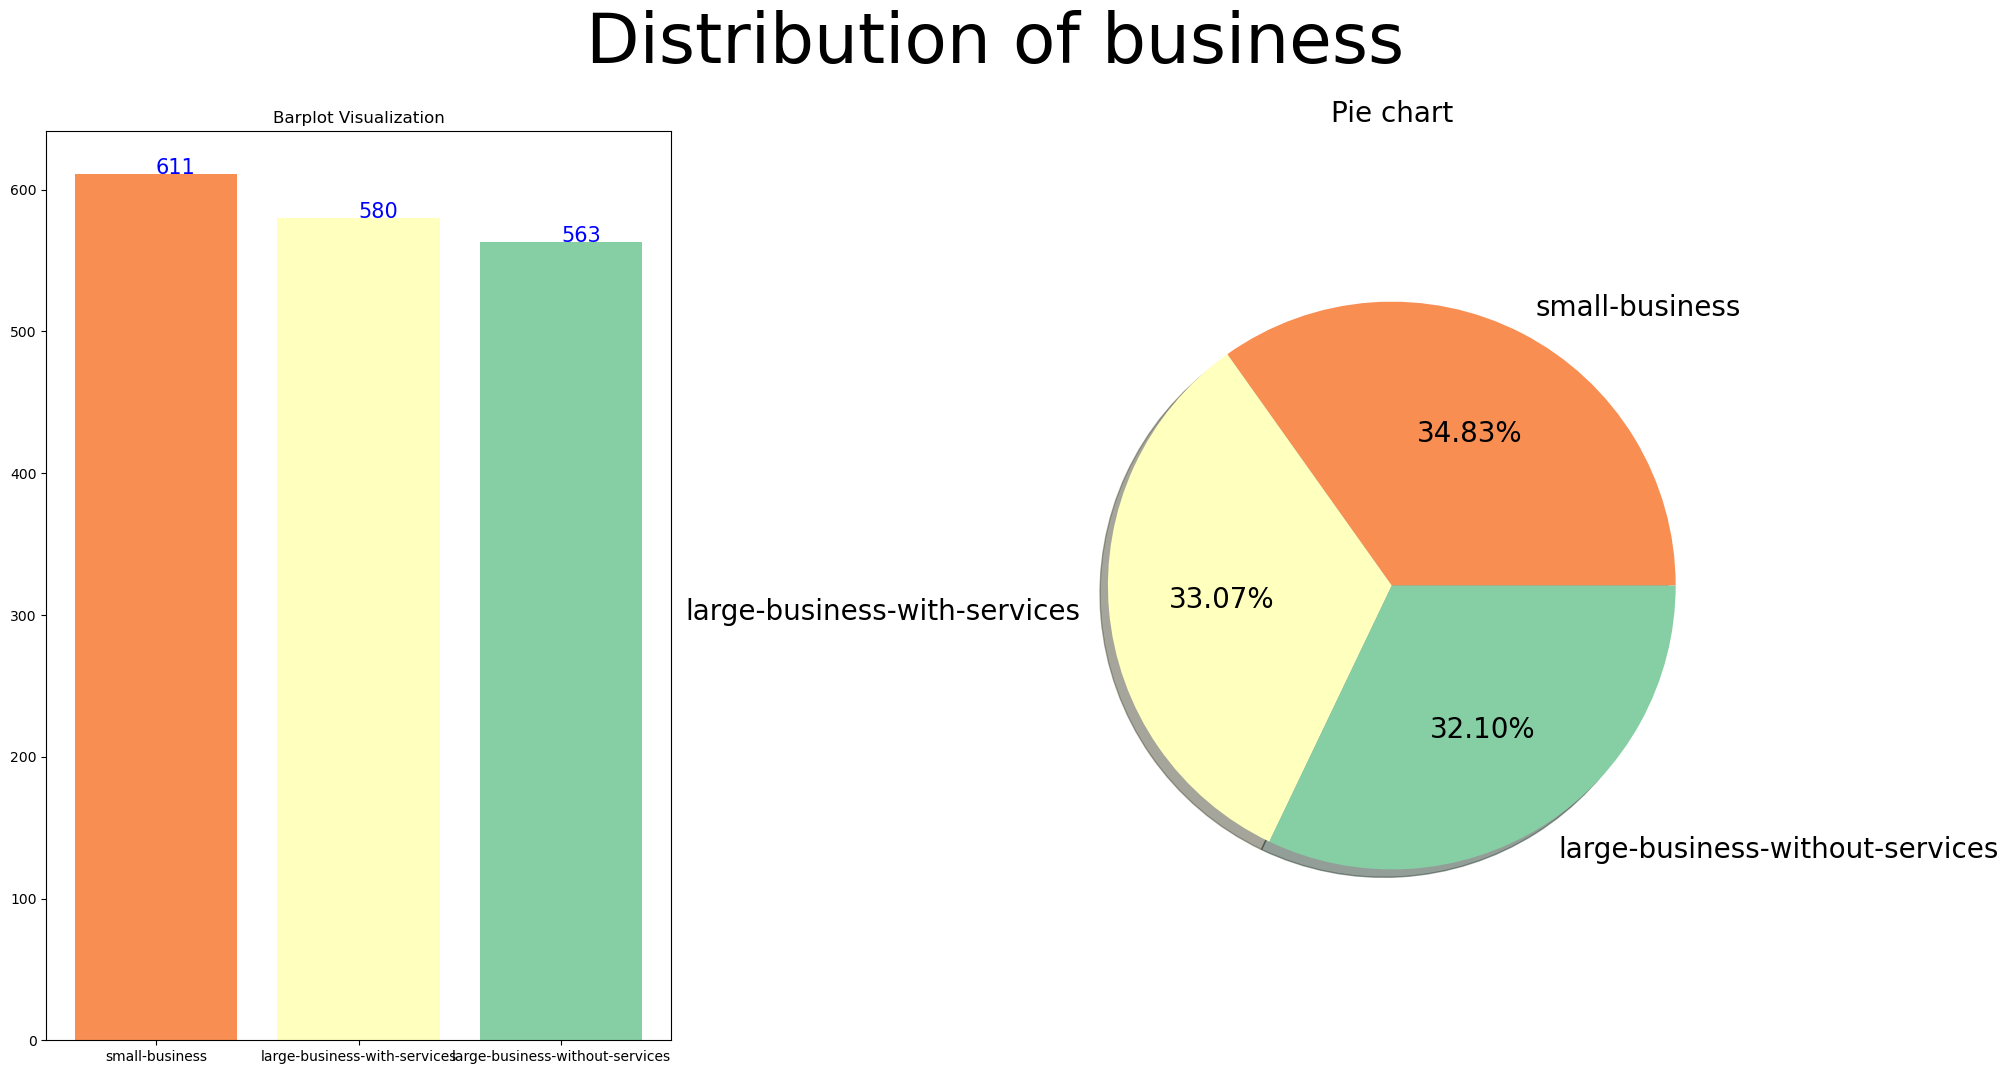

In [21]:
Visualizing_Categorical_Variable(data = data_all, 
                                col = "business",
                                 size = (20,20), 
                                name_of_color="Spectral")

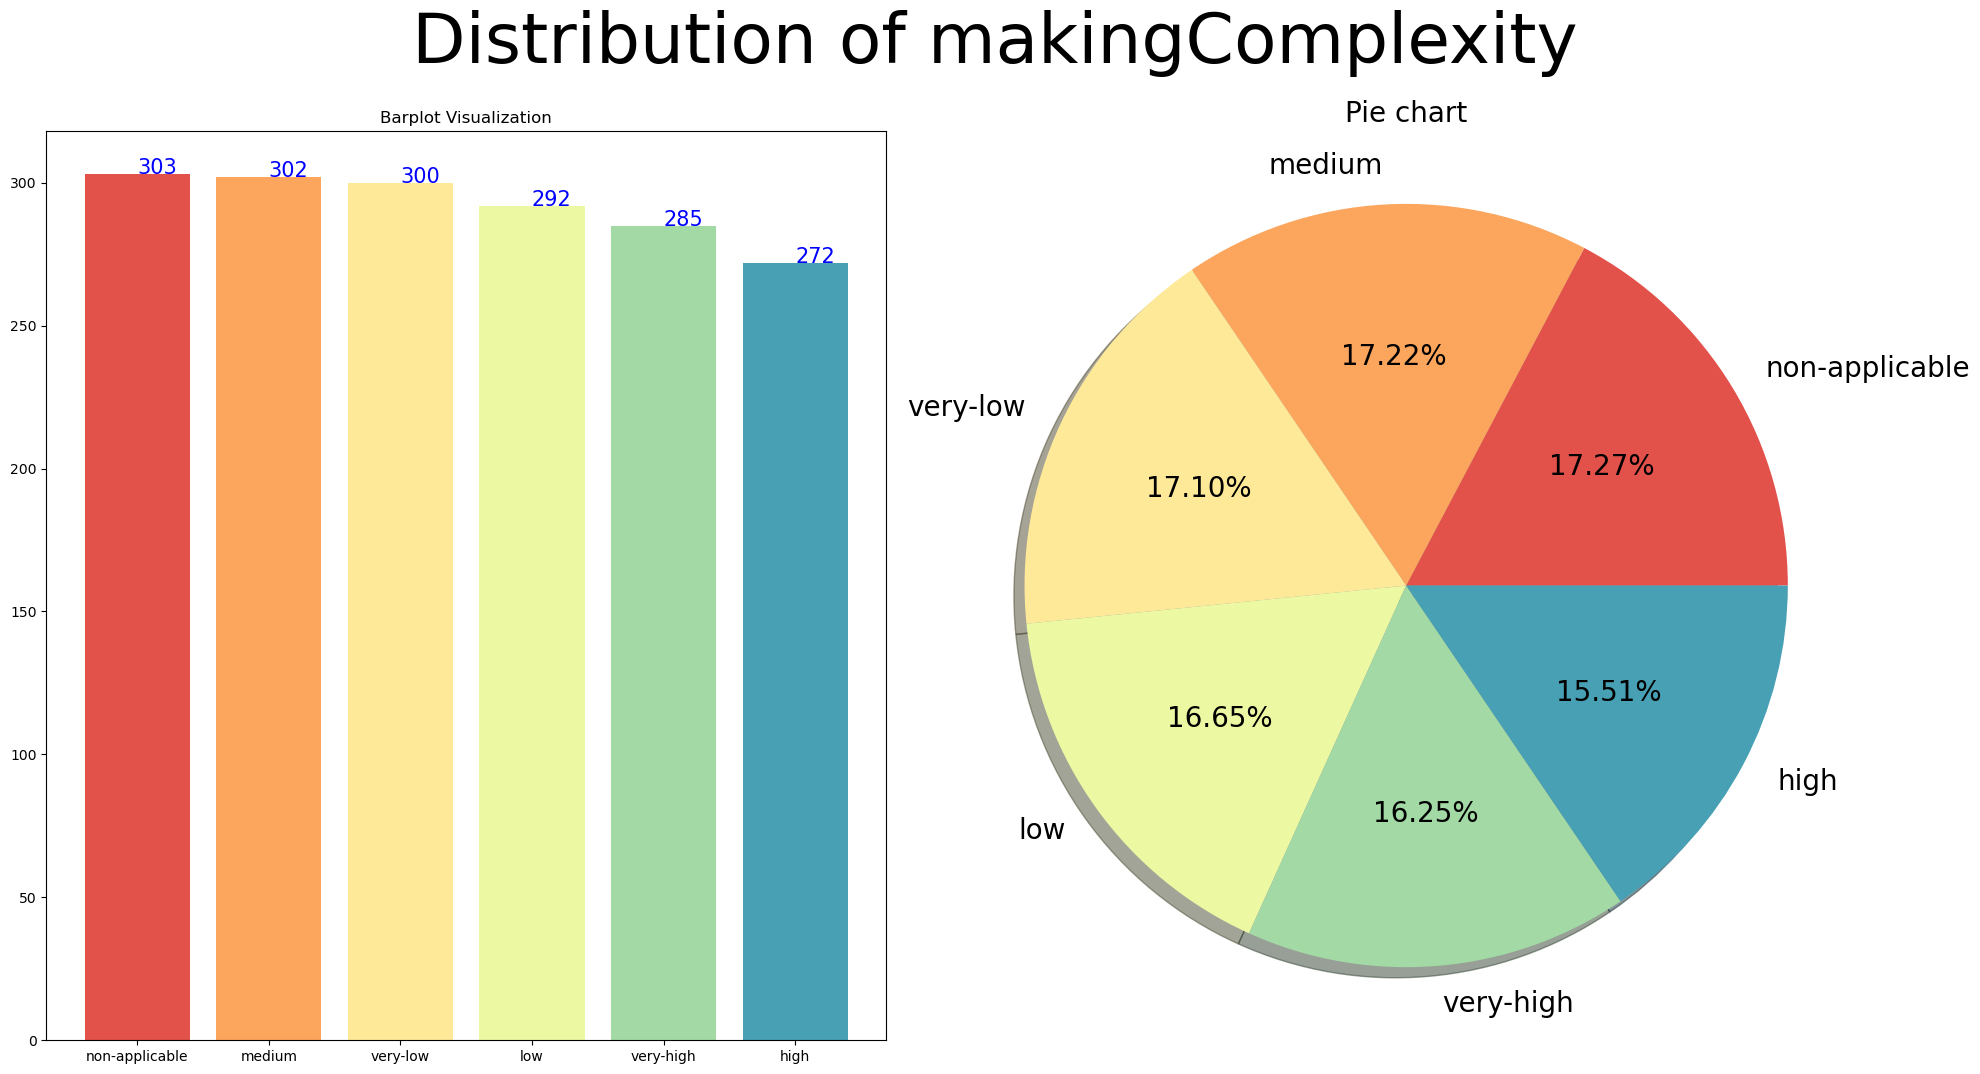

In [414]:
Visualizing_Categorical_Variable(data = data_all, 
                                col = "makingComplexity",
                                 size = (20,20), 
                                name_of_color="Spectral")

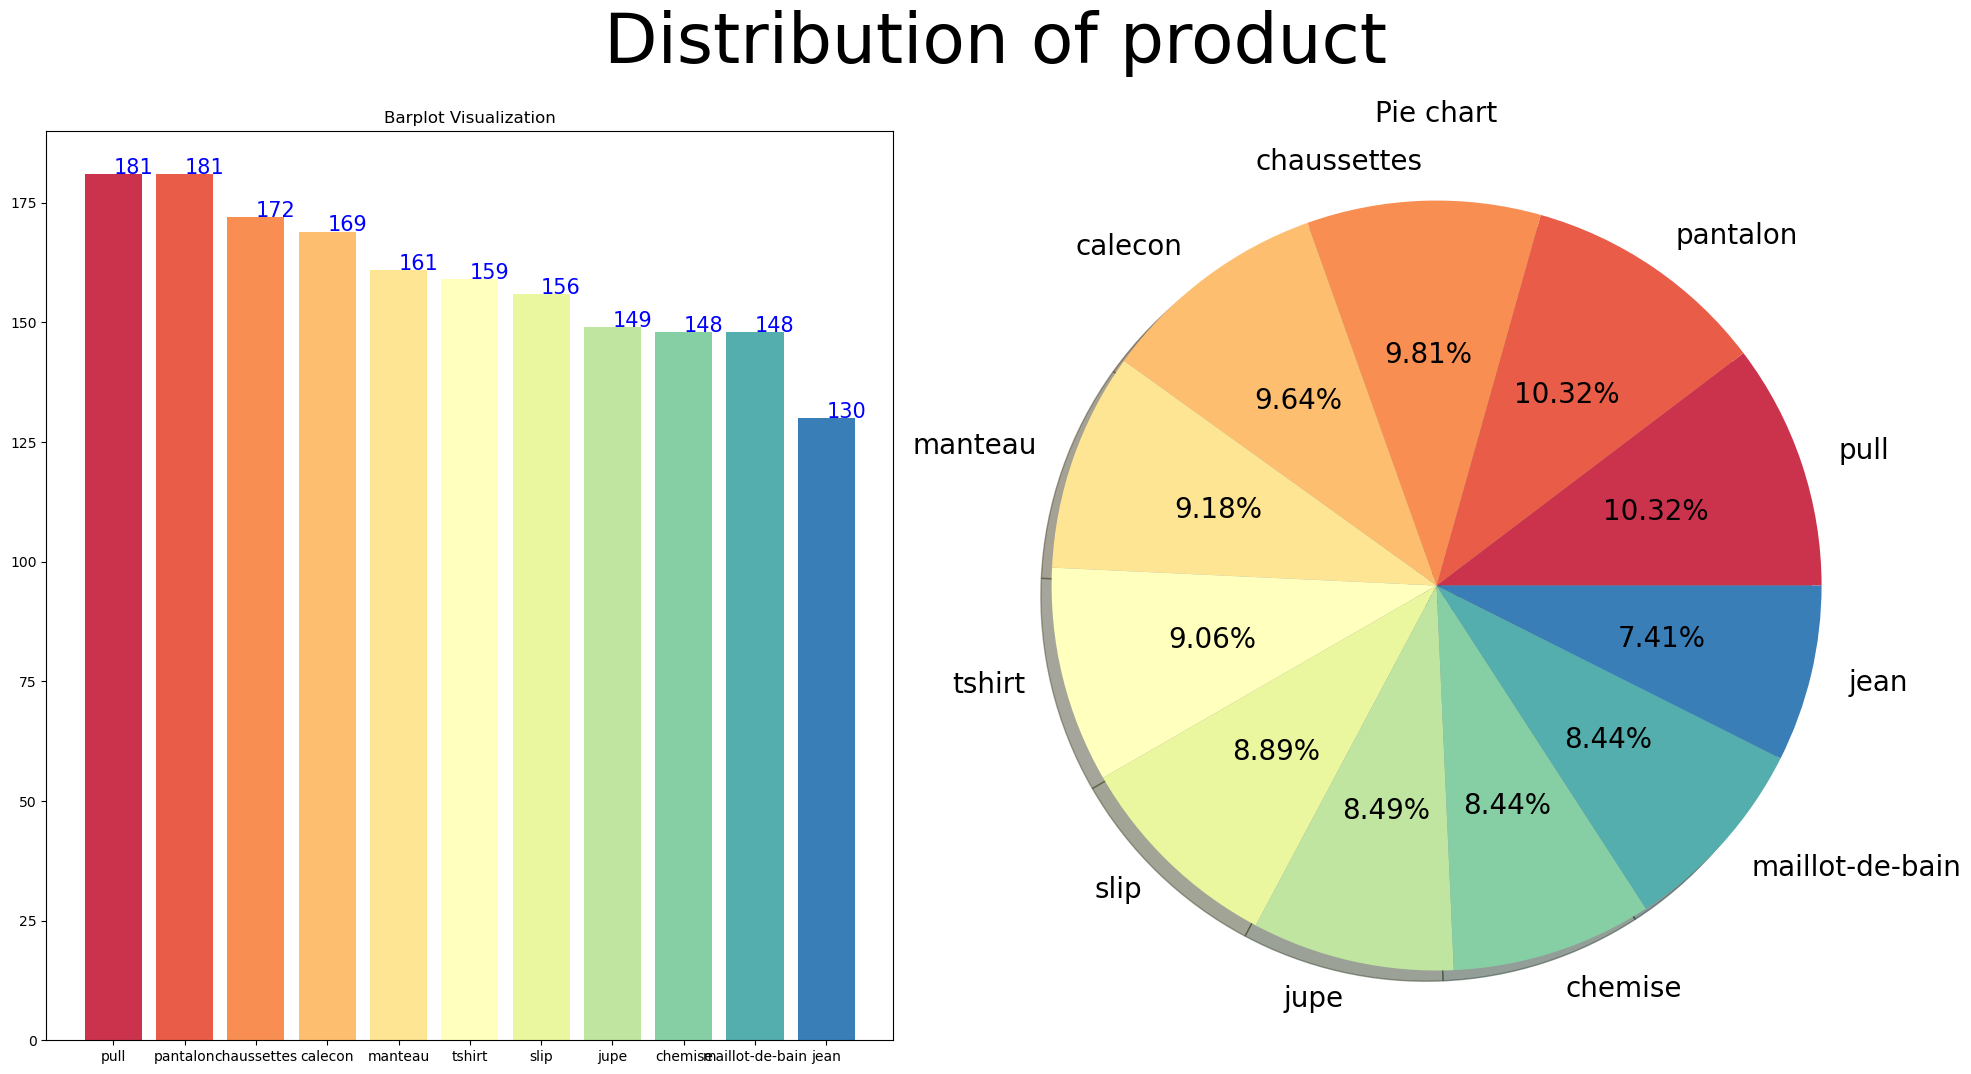

In [22]:
Visualizing_Categorical_Variable(data = data_all, 
                                col = "product",
                                 size = (20,20), 
                                name_of_color="Spectral")

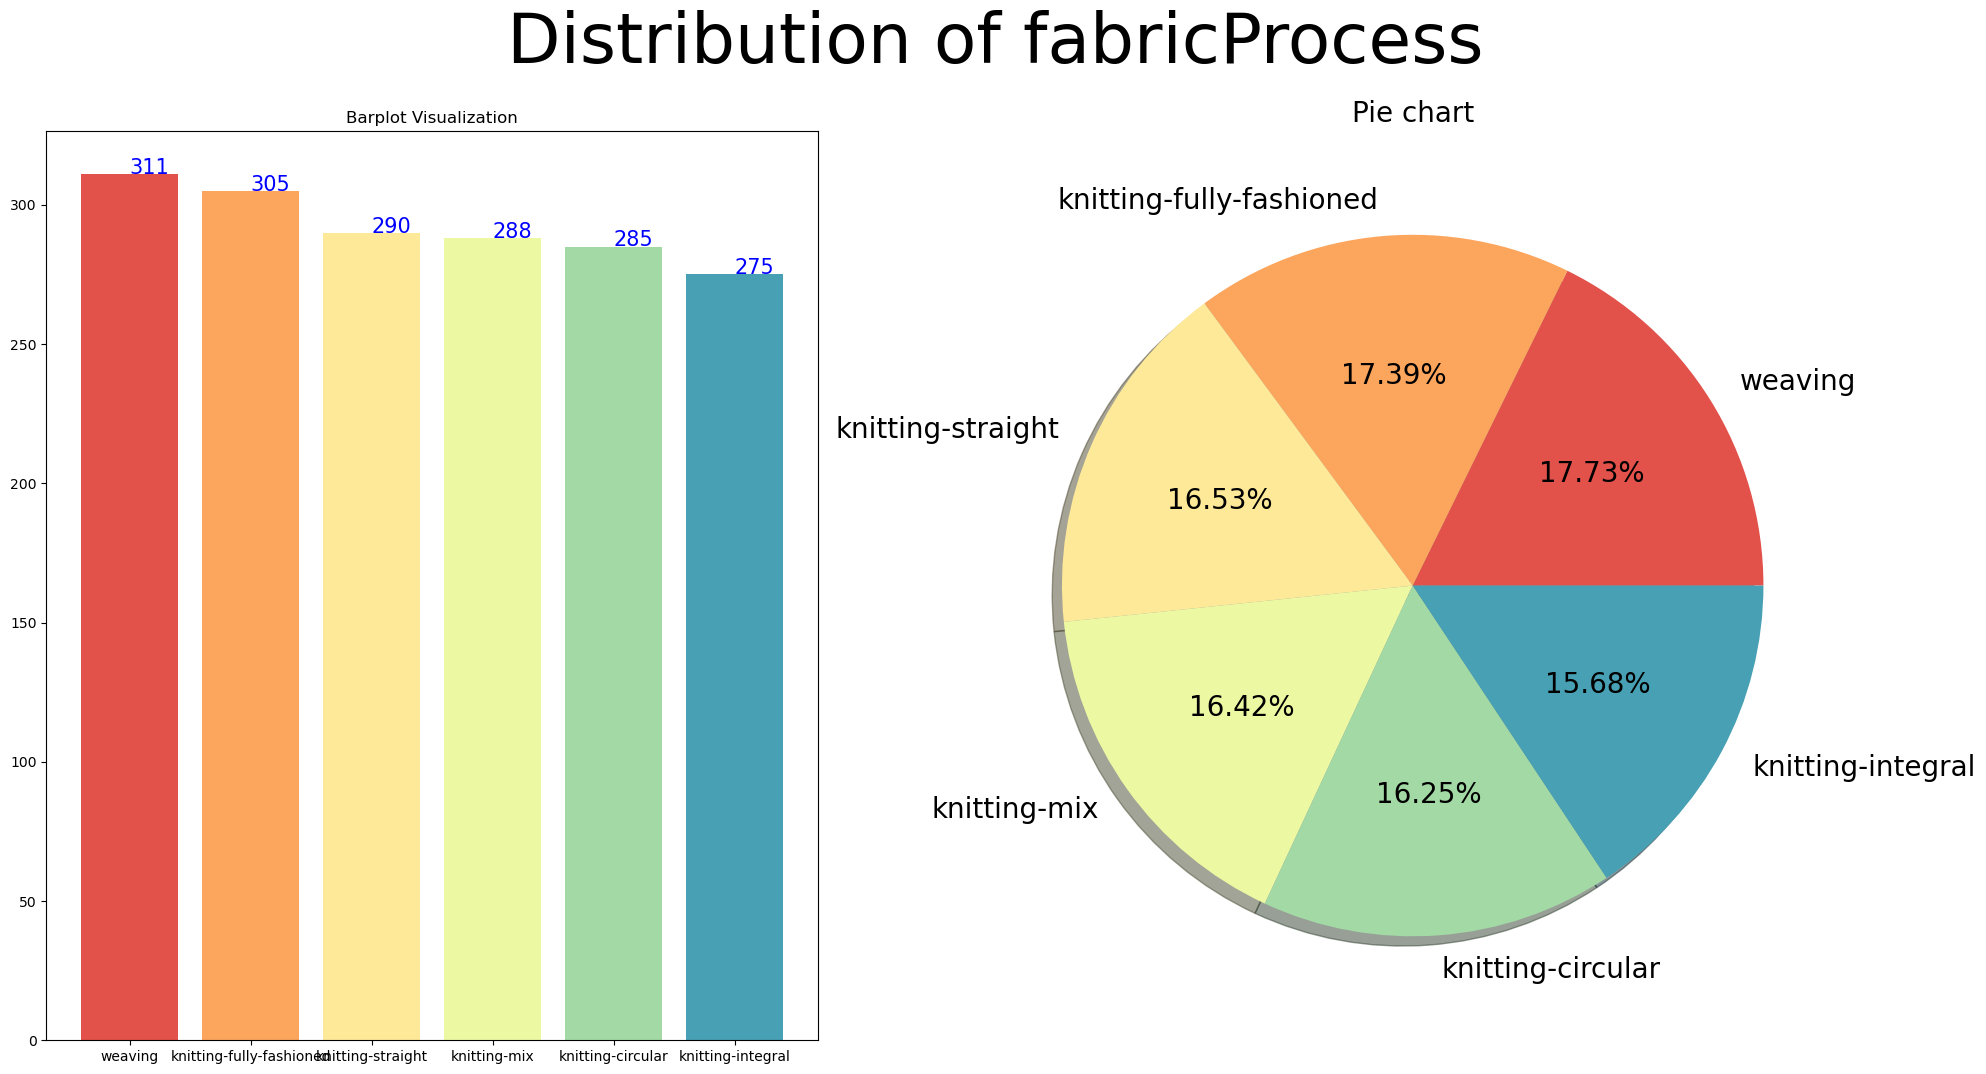

In [417]:
Visualizing_Categorical_Variable(data = data_all, 
                                col = "fabricProcess",
                                 size = (20,20), 
                                name_of_color="Spectral")

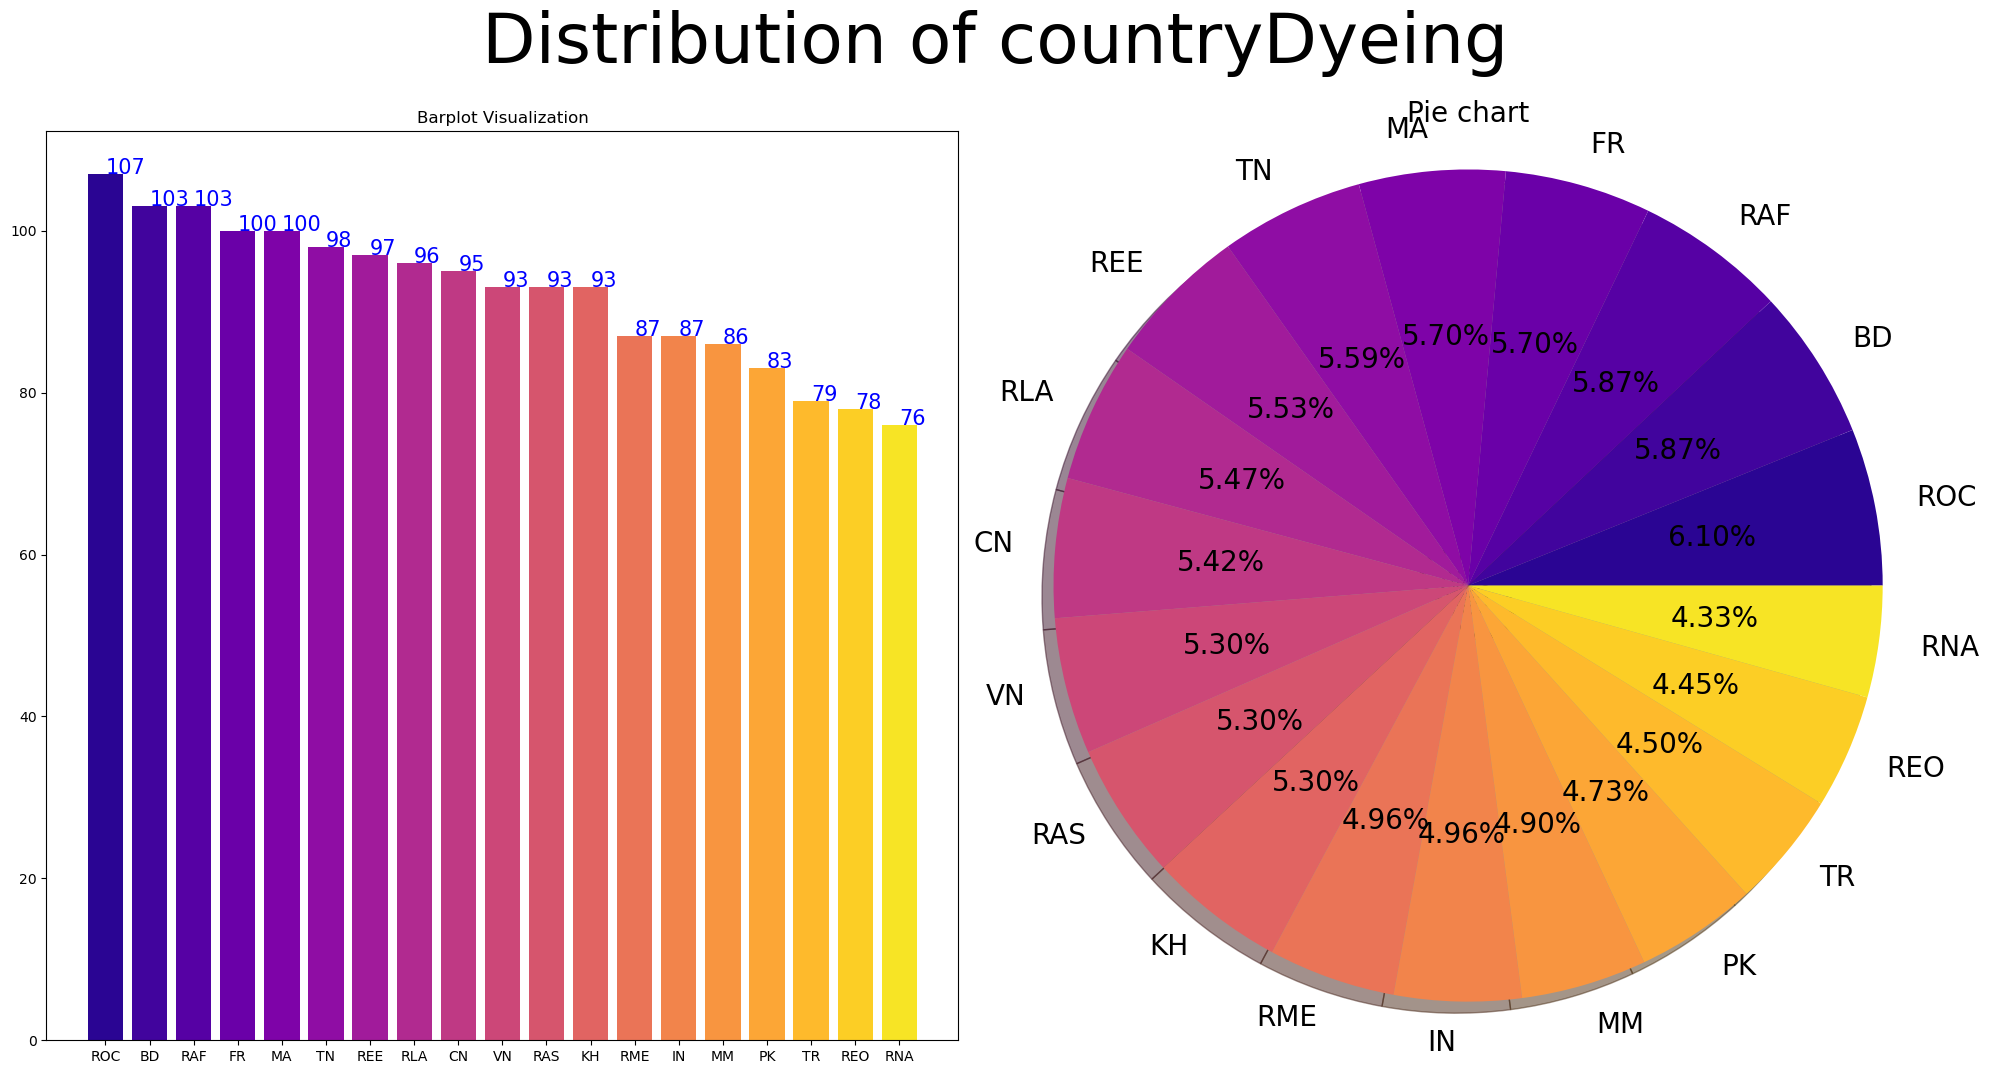

In [405]:
Visualizing_Categorical_Variable(data = data_all, 
                                col = "countryDyeing",
                                 size = (20,20), 
                                name_of_color="plasma")

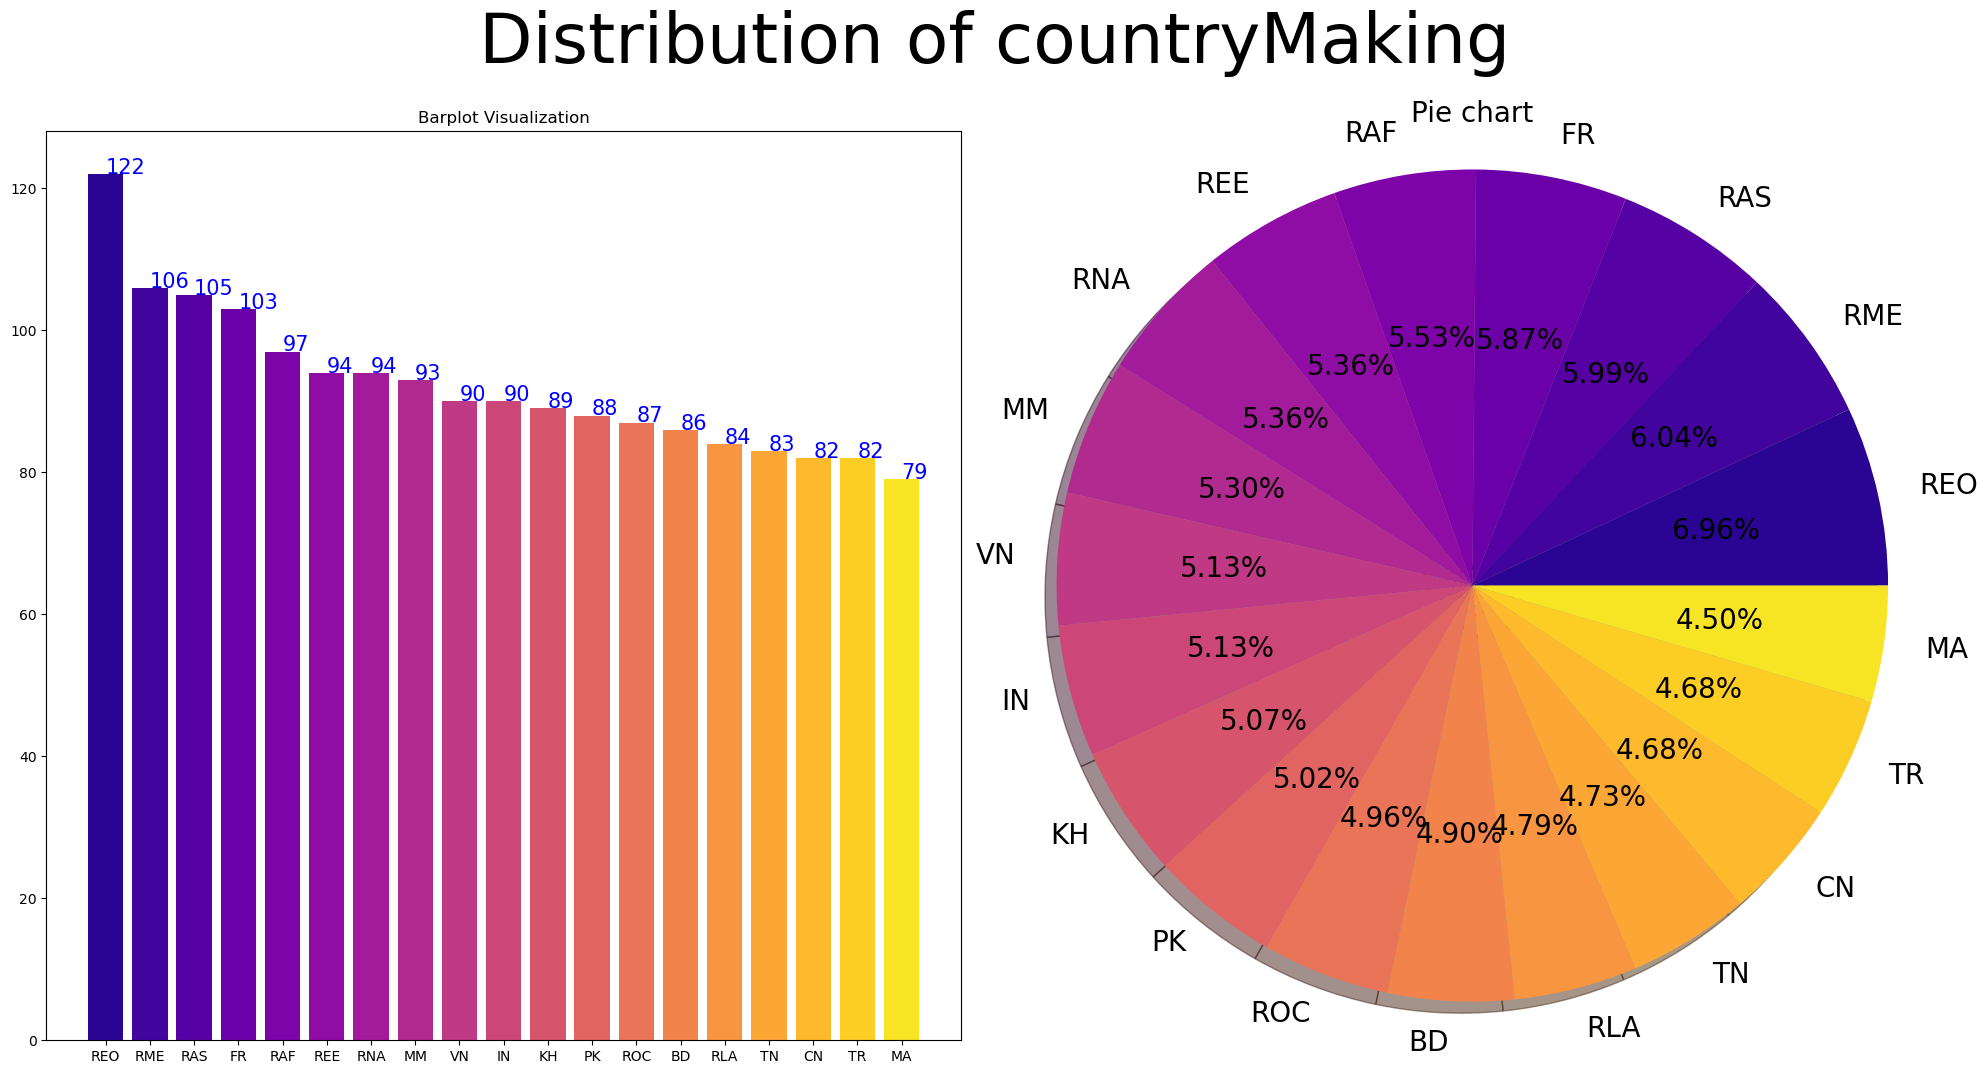

In [406]:
Visualizing_Categorical_Variable(data = data_all, 
                                col = "countryMaking",
                                 size = (20,20), 
                                name_of_color="plasma")

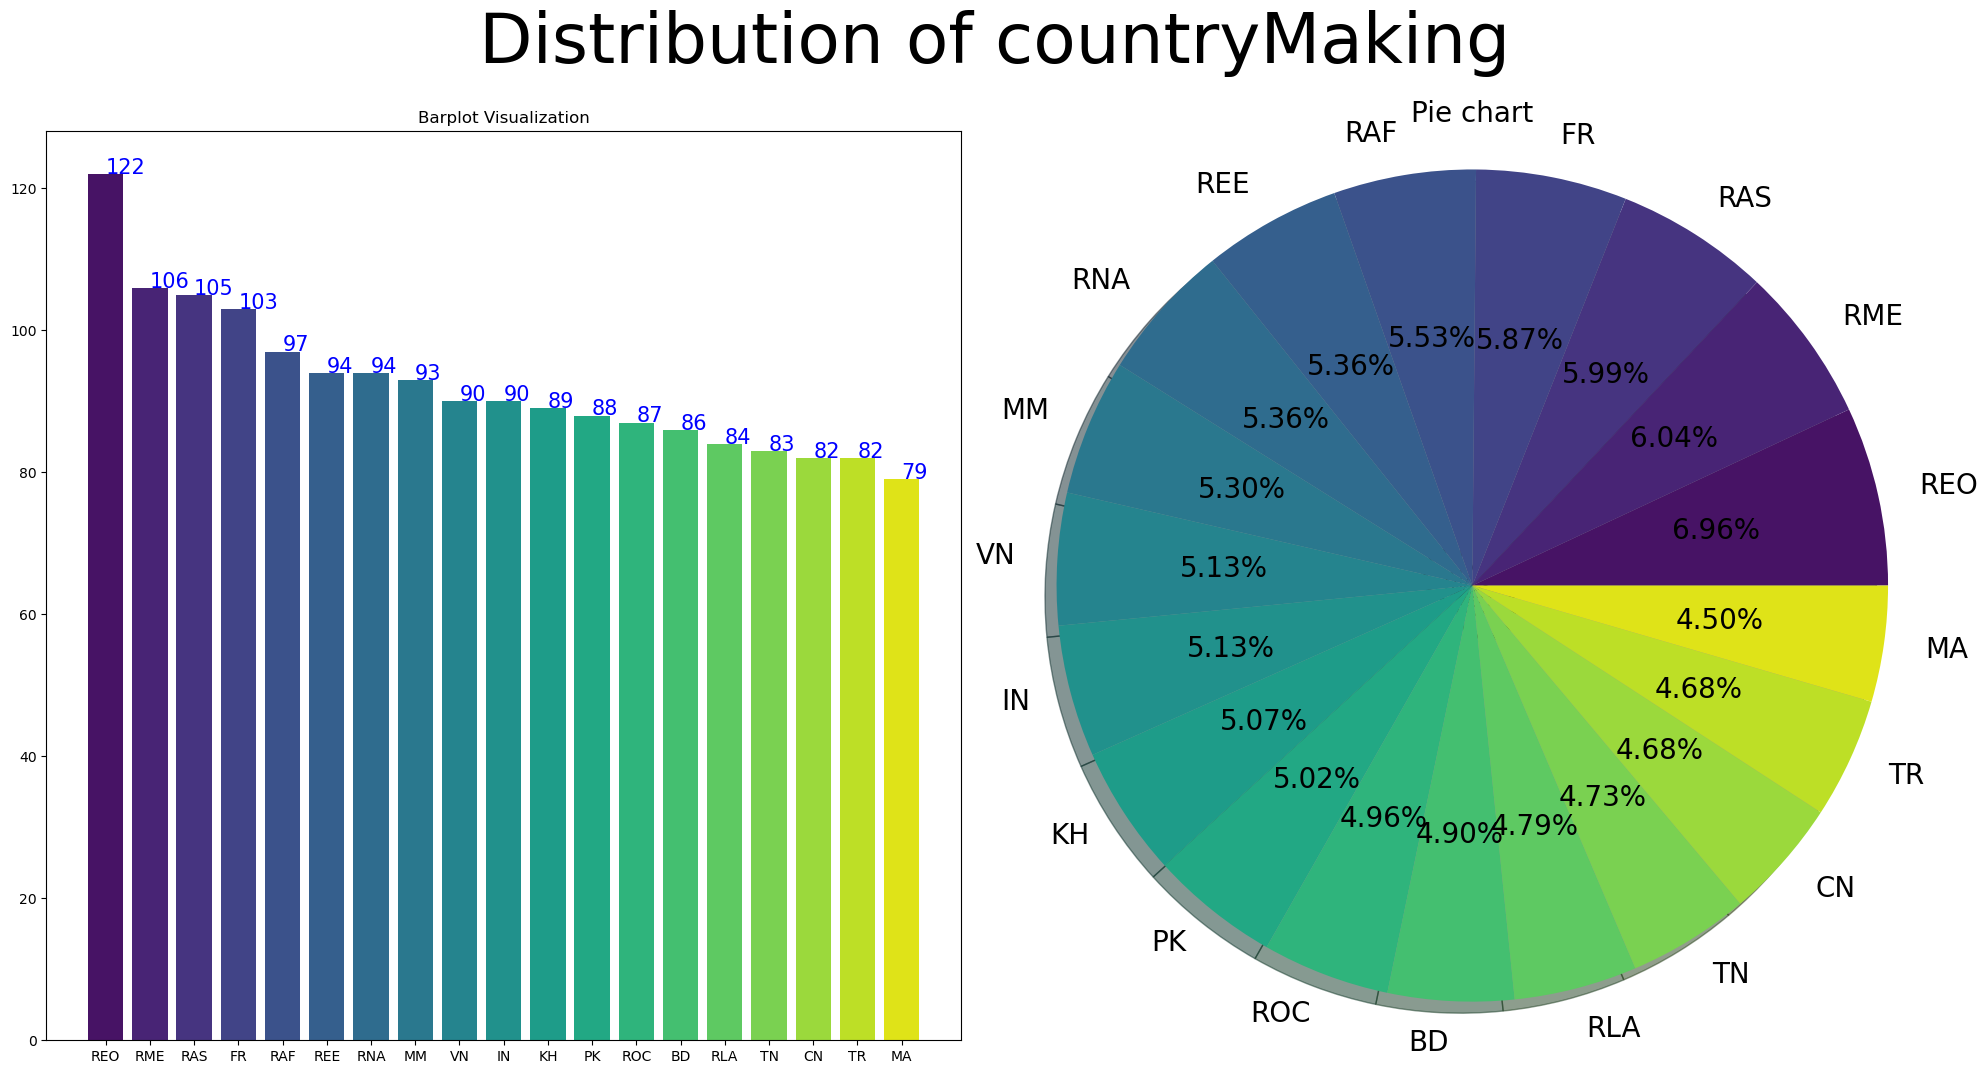

In [160]:
Visualizing_Categorical_Variable(data = data_all, 
                                col = "countryMaking",
                                 size = (20,20), 
                                name_of_color="viridis")

# Distribution of histogram

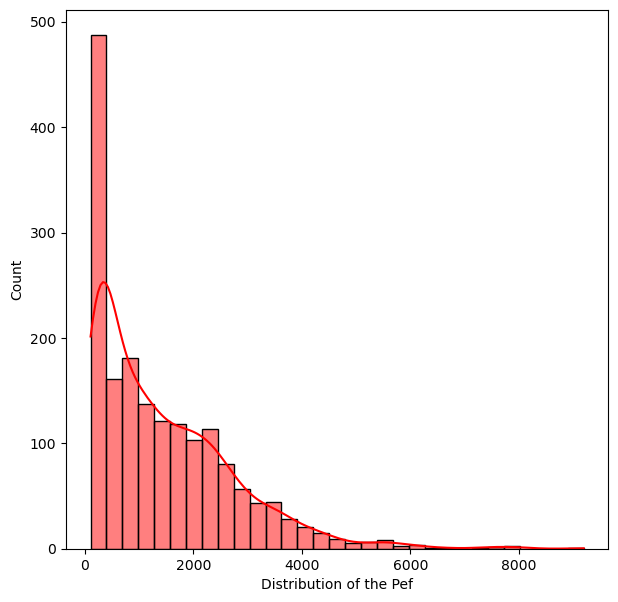

In [23]:
plt.figure(figsize=(7,7))
sns.histplot(data_all["pef"], stat="count", color = "red", kde="True")
plt.title("")
plt.xlabel("Distribution of the Pef")
plt.show()

# Checking the missing values

In [24]:
dataset_float.isnull().sum()

pef                   0
airTransportRatio     0
makingDeadStock       0
makingWaste           0
mass                  0
physicalDurability    0
price                 0
yarnSize              0
dtype: int64

# Replace The missing values 

In [445]:
dataset_float = dataset_float.fillna(dataset_float.mean(numeric_only=True))

# Save the result 

In [25]:
dataset[dataset_float.columns] = dataset_float[dataset_float.columns]
# Save data 
dataset.to_csv("dataset_preproced.csv")

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1754 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pef                 1754 non-null   Float64
 1   airTransportRatio   1754 non-null   Float64
 2   business            1754 non-null   int64  
 3   countryDyeing       1754 non-null   int64  
 4   countryFabric       1754 non-null   int64  
 5   countryMaking       1754 non-null   int64  
 6   countrySpinning     1754 non-null   int64  
 7   fabricProcess       1754 non-null   int64  
 8   makingComplexity    1754 non-null   int64  
 9   makingDeadStock     1754 non-null   Float64
 10  makingWaste         1754 non-null   Float64
 11  mass                1754 non-null   Float64
 12  numberOfReferences  1754 non-null   Int64  
 13  physicalDurability  1754 non-null   Float64
 14  price               1754 non-null   Float64
 15  product             1754 non-null   int64  
 16  surfaceMass

# Pearson Correlation

In [26]:
# Pvalues of test result between variables
def pearson_statistics_test(df):
    df = (df-df.mean())/ df.std()
    matrice = np.empty((len(df.columns), len(df.columns),))
    # Replace all values per NA values
    matrice[:] = np.nan
    #col = dataset_numeric_col.columns
    for i in range(0, len(df.columns)):
        for j in range(0,len(df.columns)):
        #matrices[i,j] = pearsonr(dataset_numerical_col.iloc[:,i], datas
            matrice[i,j] = pearsonr(df.iloc[:,i], df.iloc[:,j])[1]
    # Create a dataframe to save the pvalues
            df_pvalue = round(pd.DataFrame(matrice, columns= df.columns, index = df.columns),5)
    return df_pvalue

In [27]:
df_pvalue = pearson_statistics_test(dataset_float)
cm = sns.light_palette("green",as_cmap= True)
df_pvalue.\
style.background_gradient(cmap=cm)


,pef,airTransportRatio,makingDeadStock,makingWaste,mass,physicalDurability,price,yarnSize
pef,0.000000,0.128370,0.000240,0.000000,0.000000,0.000080,0.042910,0.000000
airTransportRatio,0.128370,0.000000,0.766170,0.404850,0.562270,0.678280,0.470710,0.698160
makingDeadStock,0.000240,0.766170,0.000000,0.122890,0.723300,0.592310,0.968300,0.186950
makingWaste,0.000000,0.404850,0.122890,0.000000,0.609760,0.015970,0.426720,0.707800
mass,0.000000,0.562270,0.723300,0.609760,0.000000,0.544640,0.178570,0.708630
physicalDurability,0.000080,0.678280,0.592310,0.015970,0.544640,0.000000,0.106530,0.515770
price,0.042910,0.470710,0.968300,0.426720,0.178570,0.106530,0.000000,0.762260
yarnSize,0.000000,0.698160,0.186950,0.707800,0.708630,0.515770,0.762260,0.000000


# Heatmap Visualization

In [28]:
def heatmap_correlation(df):
    # Standarization
    df = (df-df.mean())/ df.std()
    # Calculate the correlation
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Create a custom divergin palette
    cmap = sns.diverging_palette(100, 7, s=75, l=40,
                                n=5, center="light", as_cmap=True)
    plt.figure(figsize = (10,10))
    sns.heatmap(df.corr(), annot=True, fmt='.2f', center =0, mask = mask, cmap = cmap)
    plt.xticks(rotation=45) 

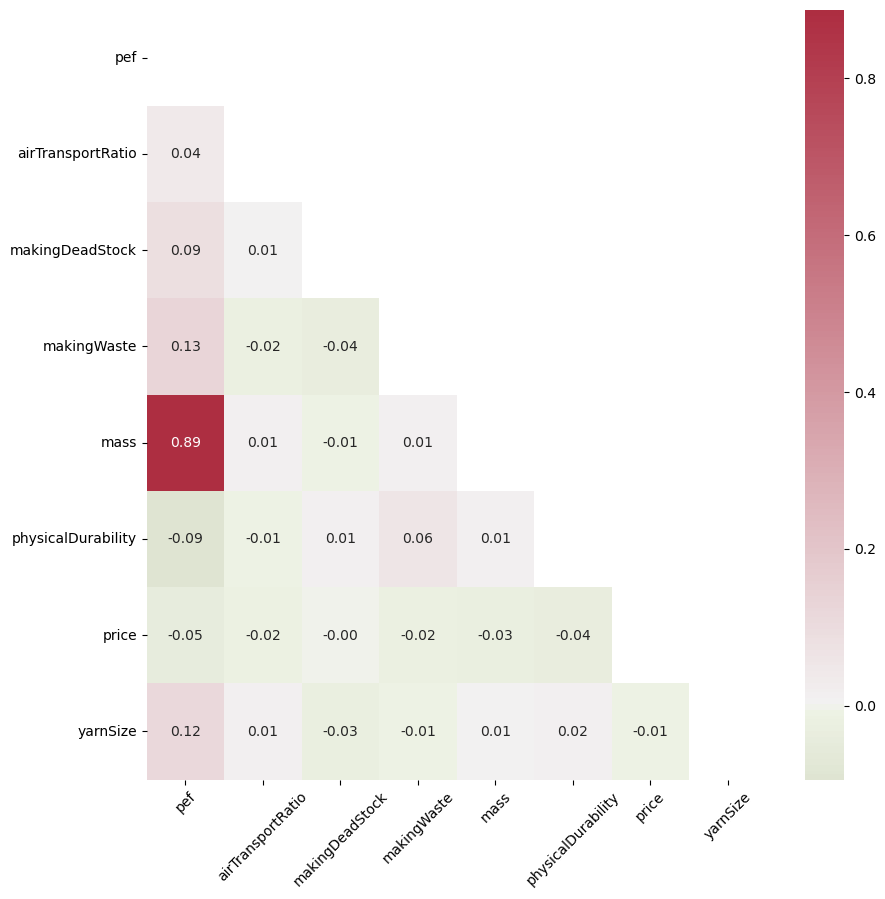

In [29]:
heatmap_correlation(dataset_float)

# Transform categorial variable 

In [30]:
def convert_cat_variable(col): 
    ## Create an instance 
    label_encoder = LabelEncoder()
    transform_col = label_encoder.fit_transform(col)
    ## return the value 
    return transform_col
## Call function 
data_all_transform = data_all
cat_col = data_all_transform.select_dtypes("string[python]").columns
## call function and use apply for transform columns
data_all_transform[cat_col]  = data_all_transform[cat_col].apply(lambda x: convert_cat_variable(x))
## Drop boolean variable
data_all_transform = data_all_transform.drop(data_all_transform.select_dtypes("boolean").columns ,axis =1)

In [454]:
data_all_transform.head()

,pef,airTransportRatio,business,countryDyeing,countryFabric,countryMaking,countrySpinning,fabricProcess,makingComplexity,makingDeadStock,makingWaste,mass,physicalDurability,price,product,surfaceMass,yarnSize
0,2358.028274,0.94,0,1,11,1,4,2,5,0.22,0.29,0.55,0.92,166.86,8,170,59.71
1,265.63471,0.34,0,14,18,0,6,2,0,0.07,0.17,0.03,0.95,585.15,9,207,186.78
2,2234.862138,0.87,0,2,1,14,12,1,2,0.05,0.22,0.45,0.76,731.64,3,253,133.62
3,3117.741446,0.51,0,12,5,13,17,5,2,0.21,0.09,0.55,1.09,586.63,8,381,146.7
4,1323.197677,0.14,1,0,13,7,10,5,1,0.1,0.34,0.15,1.1,679.01,10,460,168.66


# Regression Linéaire Simple

In [31]:
def train_test_model (df, col_selected, target_col): 
    ## select features 
    feats = np.array(df[col_selected], dtype = "float64").reshape(-1,1)
    target = df[target_col]
    # Separate data
    X_train, X_test, y_train, y_test = train_test_split(feats , target, test_size= 0.25, random_state=42)
    # Model instance 
    regressor = LinearRegression()
    # Train model 
    regressor.fit(X_train, y_train) 
    # predicton with the test data
    y_pred_test = regressor.predict(X_test)
    # Prediction with the train data
    y_pred_train = regressor.predict(X_train)
    # The coefficient of the model 
    coeffs = regressor.coef_[0]
    intercept = regressor.intercept_
    # calcul of metrics 
    R2_train = regressor.score(X_train, y_train) 
    R2_test = regressor.score(X_test, y_test)
    # Les metrics sur les données de decison 
        # train data
    mae_train = mean_absolute_error(y_train, y_pred_train) 
    mse_train = root_mean_squared_error(y_train, y_pred_train) 
    rmse_train = np.sqrt(root_mean_squared_error(y_train, y_pred_train))
            # the test data 
    mae_test = mean_absolute_error(y_test, y_pred_test) 
    mse_test = root_mean_squared_error(y_test, y_pred_test) 
    mse_test = np.sqrt(root_mean_squared_error(y_test, y_pred_test))
    # return the result 
    result = {"coeffs" : coeffs, 
              "intercept" : intercept, 
              "R2_train" : R2_train, 
              "R2_test" : R2_test, 
              "mae_train" : mae_train, 
              "mse_train" : mse_train, 
              "rmse_train" : rmse_train, 
              "mae_test" : mae_test, 
              "mse_test": mse_test, 
                "mse_test": mse_test

    }
    # return the result 
    return result

In [34]:
data_all_transform_normalized = data_all_transform.drop("pef", axis = 1)

In [35]:
col_to_normalized = [col for col in data_all_transform_normalize.columns if col in dataset_float.columns]
data_all_transform_normalized[col_to_normalized] = (data_all_transform_normalized[col_to_normalized] -data_all_transform_normalized[col_to_normalized].mean())/  data_all_transform_normalized[col_to_normalized].std()

NameError: name 'data_all_transform_normalize' is not defined

In [458]:
data_all_transform_normalized.head()

,airTransportRatio,business,countryDyeing,countryFabric,countryMaking,countrySpinning,fabricProcess,makingComplexity,makingDeadStock,makingWaste,mass,physicalDurability,price,product,surfaceMass,yarnSize
0,1.528184,0,1,11,1,4,2,5,0.80766,0.775374,0.905612,-0.622068,-1.202334,8,170,-0.81748
1,-0.551849,0,14,18,0,6,2,0,-0.915182,-0.262666,-0.999435,-0.49113,0.275767,9,207,1.523304
2,1.285514,0,2,1,14,12,1,2,-1.144895,0.16985,0.539257,-1.320405,0.793415,3,253,0.544032
3,0.037494,0,12,5,13,17,5,2,0.692804,-0.954693,0.905612,0.119915,0.280997,8,381,0.784981
4,-1.245194,1,0,13,7,10,5,1,-0.570614,1.207891,-0.559809,0.163561,0.607438,10,460,1.189511


# Call function

In [459]:
df = pd.concat([pd.DataFrame(data_all_transform["pef"]), data_all_transform_normalized], axis=1)

In [460]:
df.head()

,pef,airTransportRatio,business,countryDyeing,countryFabric,countryMaking,countrySpinning,fabricProcess,makingComplexity,makingDeadStock,makingWaste,mass,physicalDurability,price,product,surfaceMass,yarnSize
0,2358.028274,1.528184,0,1,11,1,4,2,5,0.80766,0.775374,0.905612,-0.622068,-1.202334,8,170,-0.81748
1,265.63471,-0.551849,0,14,18,0,6,2,0,-0.915182,-0.262666,-0.999435,-0.49113,0.275767,9,207,1.523304
2,2234.862138,1.285514,0,2,1,14,12,1,2,-1.144895,0.16985,0.539257,-1.320405,0.793415,3,253,0.544032
3,3117.741446,0.037494,0,12,5,13,17,5,2,0.692804,-0.954693,0.905612,0.119915,0.280997,8,381,0.784981
4,1323.197677,-1.245194,1,0,13,7,10,5,1,-0.570614,1.207891,-0.559809,0.163561,0.607438,10,460,1.189511


In [461]:
print(feats.shape)
print(df.shape)

(1754, 17)
(1754, 17)


In [462]:
feats = data_all_transform_normalized
dict_of_result = {}
num_col = df.columns
for col in feats.columns: 
    dict_of_result[col] =  train_test_model(df=df,
                                            col_selected=col,
                                            target_col= "pef")

# Create a dictionary
model_result = pd.DataFrame(dict_of_result).T
model_result = model_result.sort_values(by =["R2_test"], ascending = False)
display(model_result)
# Select top features 
#top_model_result = model_result[model_result["R2_test"] >0.2]["R2_test"]

,coeffs,intercept,R2_train,R2_test,mae_train,mse_train,rmse_train,mae_test,mse_test
mass,1124.292835,1426.834060,0.793546,0.765936,343.936983,575.337328,23.986190,363.964737,25.330277
product,104.278678,911.217718,0.069149,0.046744,944.957754,1221.660945,34.952267,977.452789,35.983917
yarnSize,130.531118,1441.251086,0.010766,0.018974,1002.087593,1259.389655,35.487880,1019.994729,36.243171
makingDeadStock,80.019296,1439.278542,0.004081,0.014711,1004.300593,1263.637574,35.547680,1026.282953,36.282484
makingWaste,175.303831,1442.326845,0.019144,0.009558,995.140417,1254.044896,35.412496,1021.548866,36.329823
fabricProcess,26.432780,1374.910262,0.001251,0.007866,1005.618307,1265.431368,35.572902,1027.530653,36.345337
physicalDurability,-132.123622,1437.238732,0.011056,0.002382,998.307208,1259.204839,35.485276,1027.440309,36.395455
airTransportRatio,19.130899,1440.678238,0.000230,0.002144,1005.312642,1266.078167,35.581992,1027.734724,36.397620
countryFabric,-4.103807,1477.251888,0.000325,0.001282,1004.477183,1266.018157,35.581149,1029.692578,36.405479
makingComplexity,12.925959,1408.359508,0.000299,0.001164,1005.142711,1266.034550,35.581379,1029.153197,36.406557


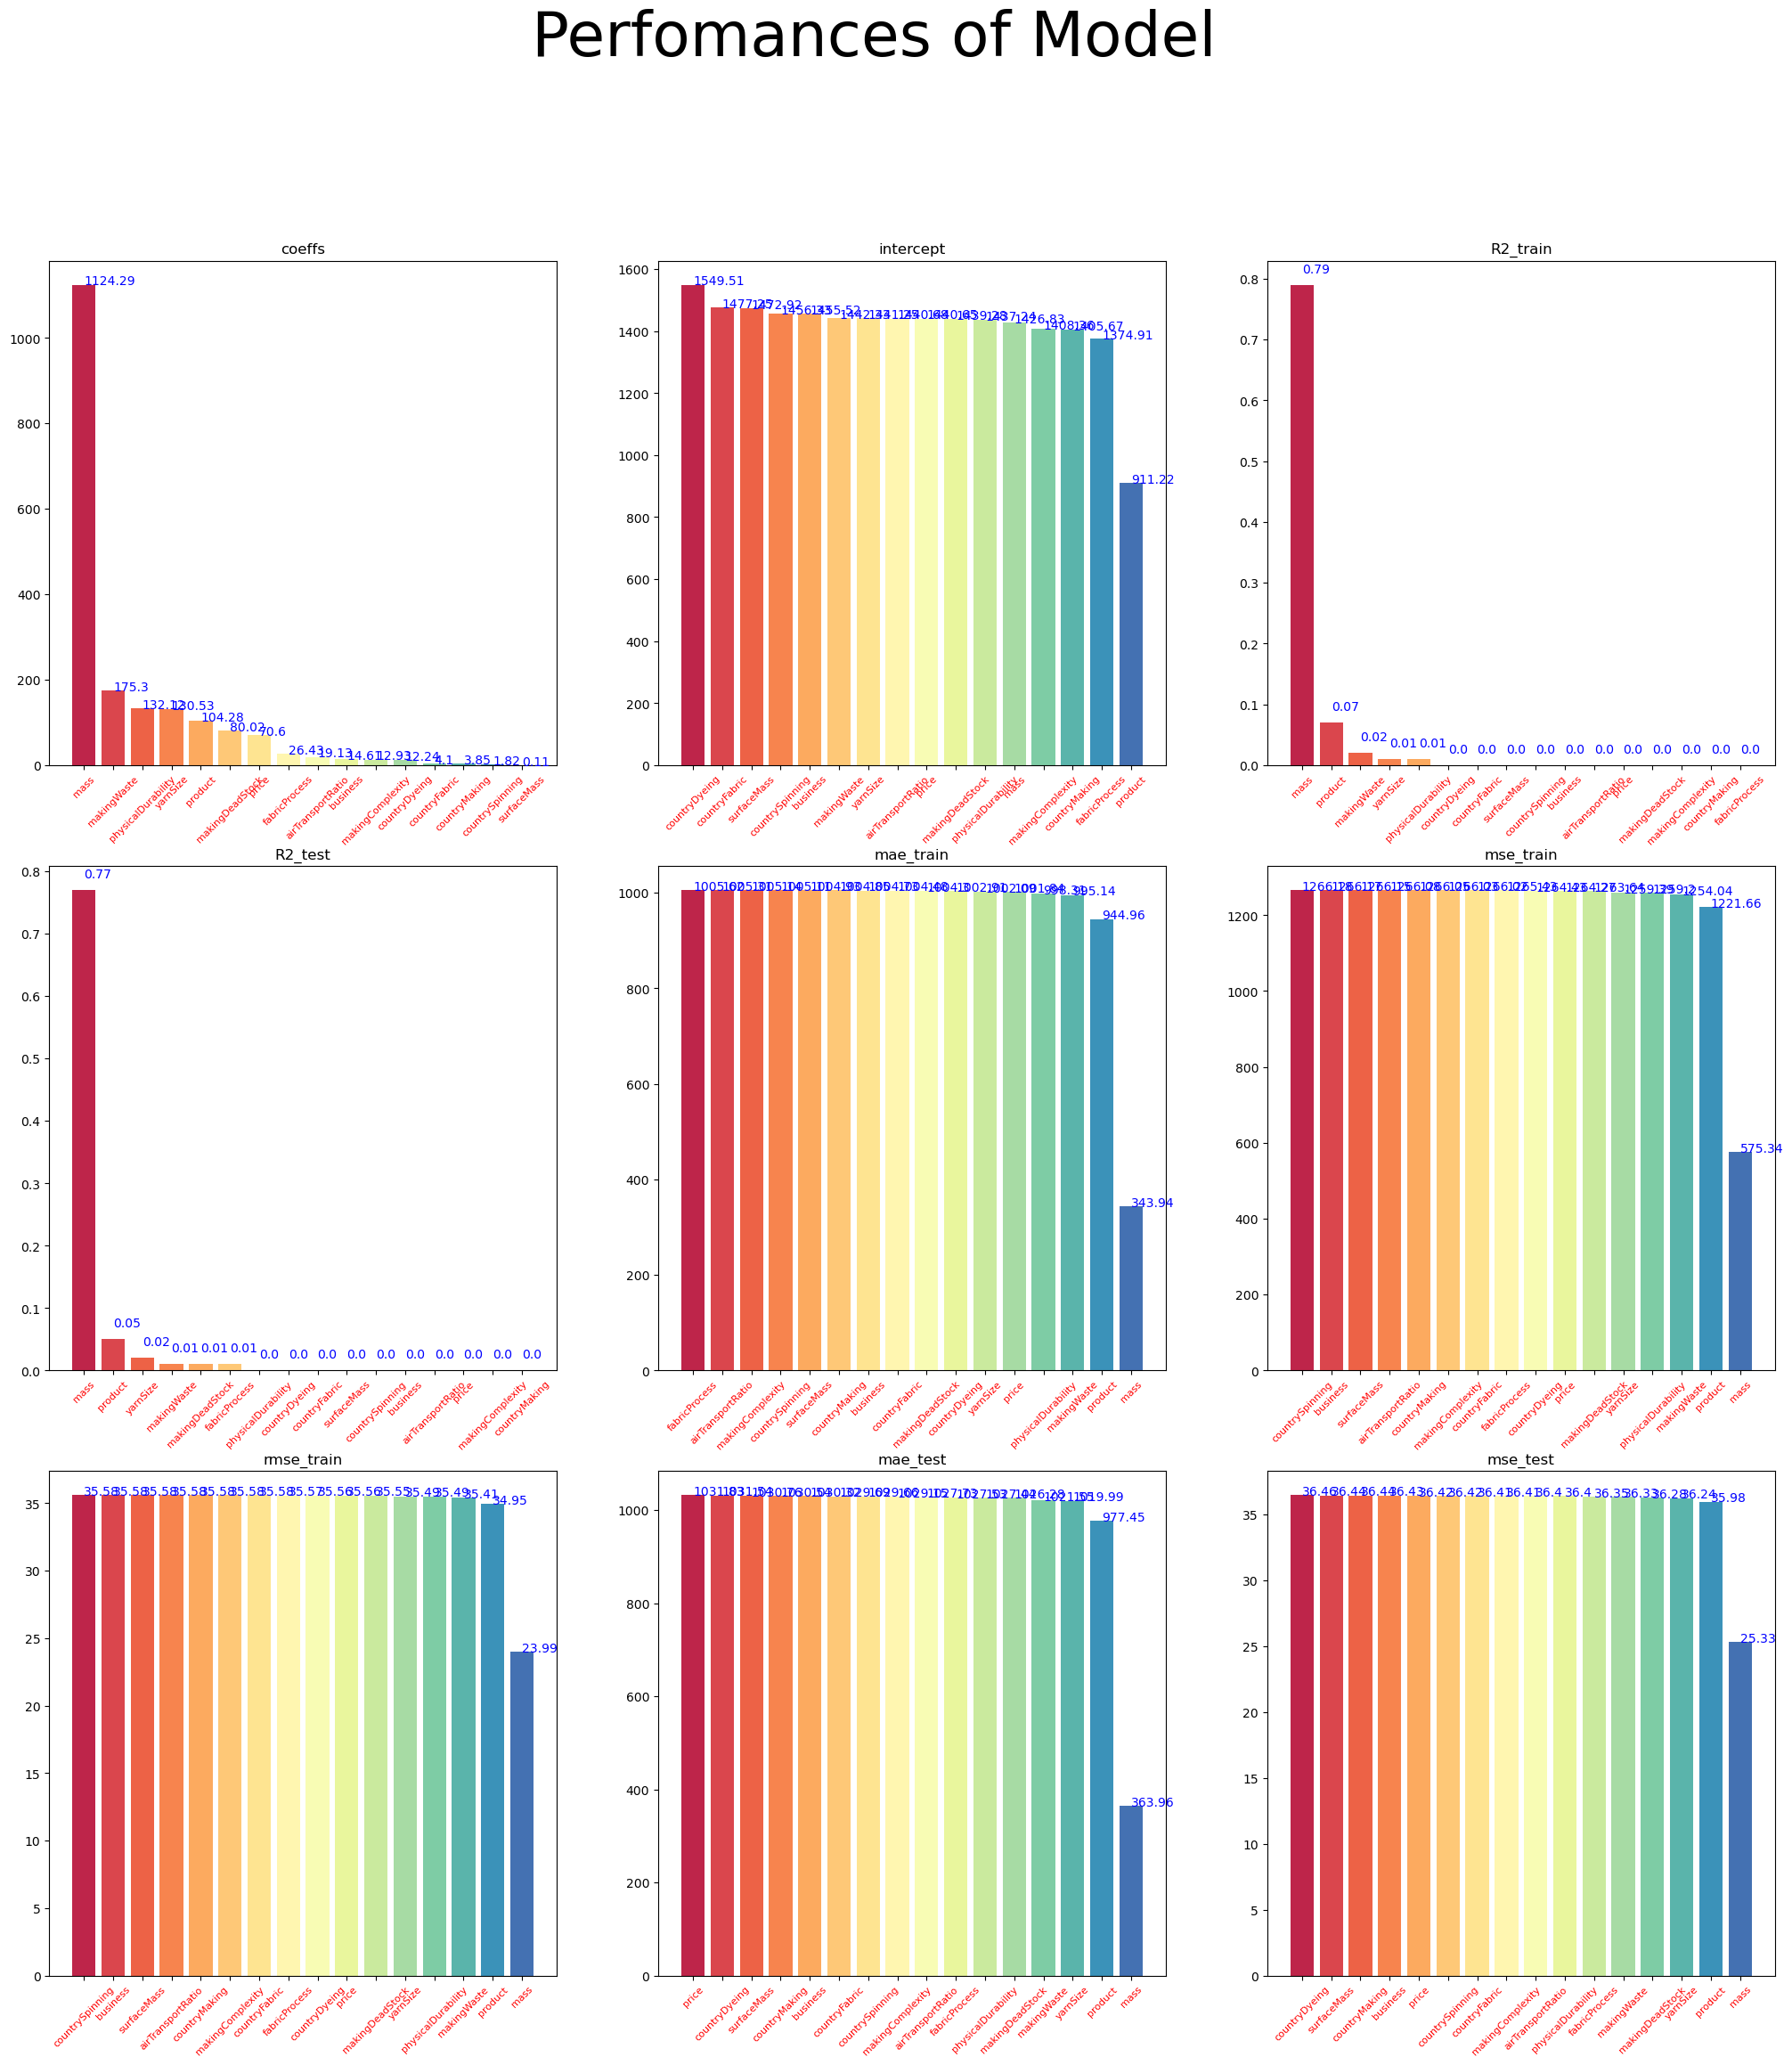

In [463]:
def evaluate_model (data):
    ## Get the absolate value 
    data = abs(model_result)
    data =  round(data,2)

    fig = plt.figure(figsize=(25,25))
    st = fig.suptitle("Perfomances of Model ", fontsize =50, verticalalignment = "center")
    for col, num in zip(data.columns, range(1,11)): 
        data = data.sort_values(by = [col], ascending = False)
        labels = data.index 
        # Create colors for barplot 
        colors = sns.color_palette("Spectral", len(labels)).as_hex()
        values = data[col]
        ax = fig.add_subplot(3,3,num)
        ax.bar(labels, values, color = colors)
        for index, value in enumerate(values): 
            plt.text(x = index, y = value+0.02, s = f"{value}", fontdict=dict(fontsize=10), color = "blue")
            plt.title(col)
            plt.xticks(color='r', size = 8, rotation = 45)
## test
evaluate_model(model_result)

# Features selection and model Optimization

## Correlation between the variables

In [464]:
abs_corr_coeffs = df.corr()["pef"].abs().sort_values( ascending = False)
#Select variables whose correlation coefficient is greater than 0.4
abs_corr_coeffs_selected = abs_corr_coeffs[abs_corr_coeffs > 0.02]
abs_corr_coeffs_selected

pef                   1.000000
mass                  0.886728
product               0.251627
makingWaste           0.129461
yarnSize              0.115179
physicalDurability    0.094350
makingDeadStock       0.087578
fabricProcess         0.062124
price                 0.048348
airTransportRatio     0.036320
countryDyeing         0.035512
countryFabric         0.028529
makingComplexity      0.027659
Name: pef, dtype: float64

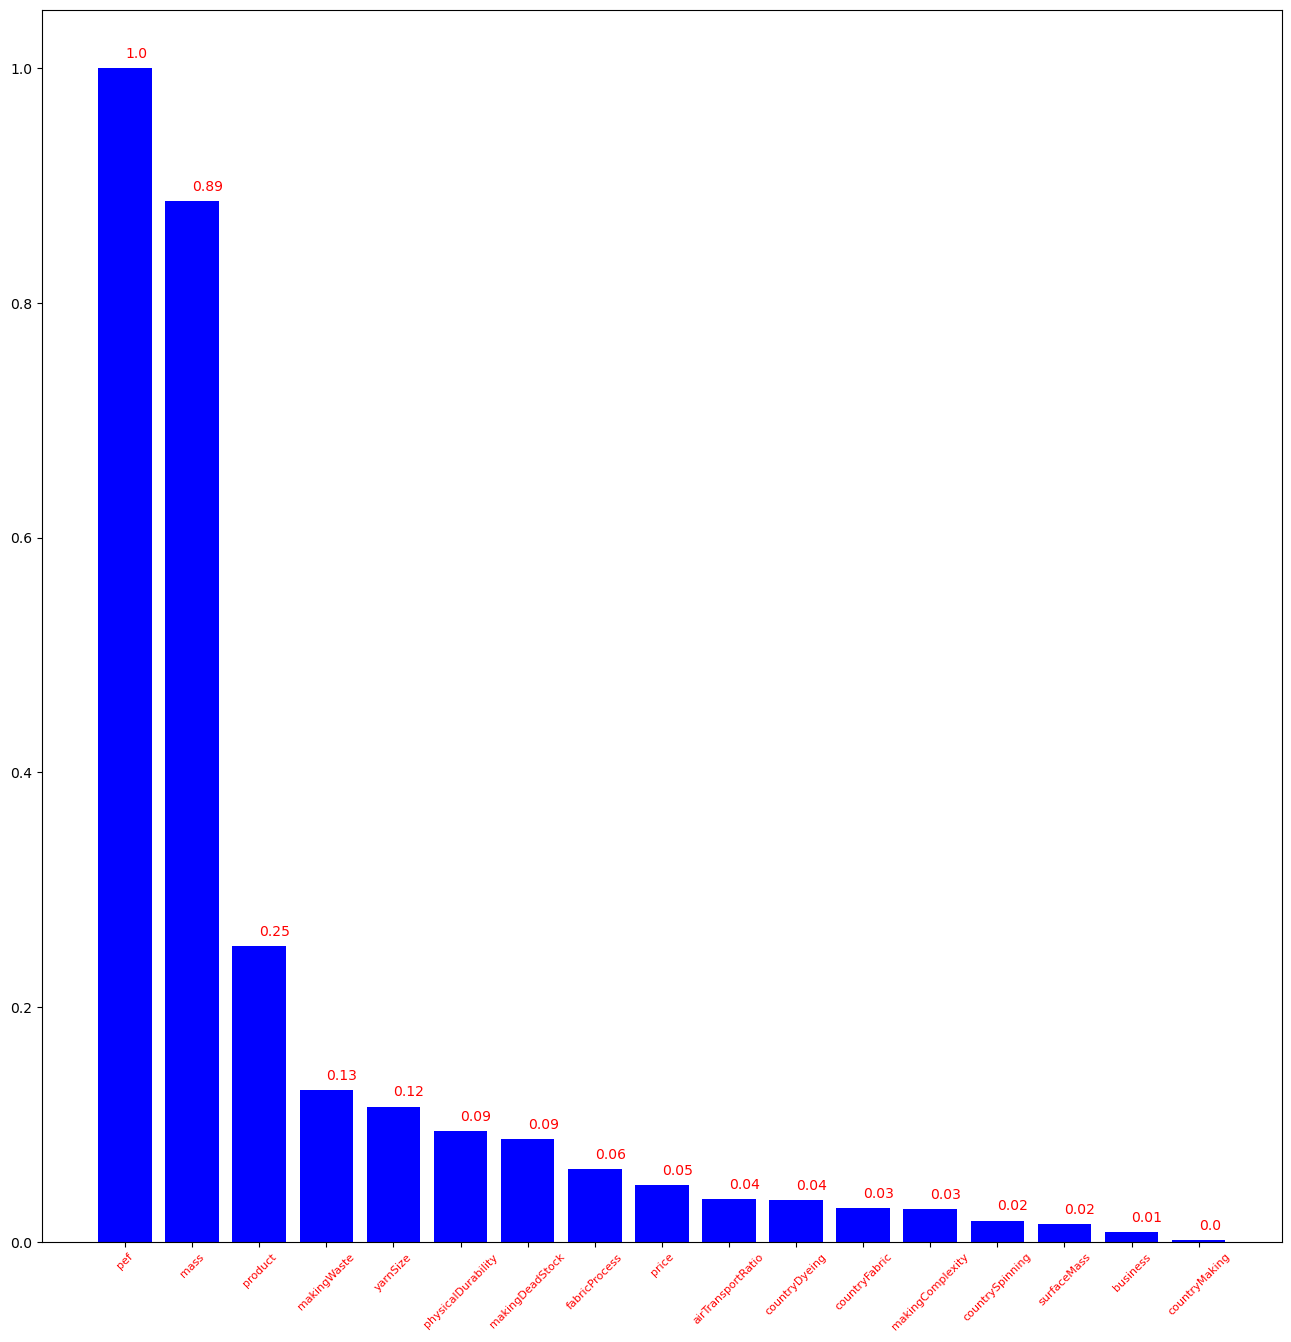

In [465]:
plt.figure(figsize=(16,16))
plt.bar(abs_corr_coeffs.index, abs_corr_coeffs.values, color = "blue")
for index, value in enumerate(abs_corr_coeffs.values): 
    plt.text( x = index, y = value+0.009, s=f"{round(value,2)}",fontdict=dict(fontsize=10), color = "red")
    plt.xticks(color='r', size = 8, rotation = 45)


# Multiple Linear Regression

In [466]:
def multiple_linear_regressor (df, col_selected, target_col): 
    ## select features 
    feats = df[col_selected]
    target = df[target_col]
    # Separate data
    X_train, X_test, y_train, y_test = train_test_split(feats , target, test_size= 0.25, random_state=42)
    # Model instance 
    regressor = LinearRegression()
    # Train model 
    regressor.fit(X_train, y_train) 
    # predicton with the test data
    y_pred_test = regressor.predict(X_test)
    # Prediction with the train data
    y_pred_train = regressor.predict(X_train)
    # The coefficient of the model 
    coeffs = regressor.coef_
    intercept = regressor.intercept_
    # calcul of metrics 
    R2_train = regressor.score(X_train, y_train) 
    R2_test = regressor.score(X_test, y_test)
    # Les metrics sur les données de decison 
        # train data
    mae_train = mean_absolute_error(y_train, y_pred_train) 
    mse_train = root_mean_squared_error(y_train, y_pred_train) 
    rmse_train = np.sqrt(root_mean_squared_error(y_train, y_pred_train))
            # the test data 
    mae_test = mean_absolute_error(y_test, y_pred_test) 
    mse_test = root_mean_squared_error(y_test, y_pred_test) 
    mse_test = np.sqrt(root_mean_squared_error(y_test, y_pred_test))
    # return the result 
    result = {"regressor" : regressor,
              "coeffs" : coeffs, 
              "intercept" : intercept, 
              "R2_train" : R2_train, 
              "R2_test" : R2_test, 
              "mae_train" : mae_train, 
              "mse_train" : mse_train, 
              "rmse_train" : rmse_train, 
              "mae_test" : mae_test, 
              "mse_test": mse_test, 
                "mse_test": mse_test,

              "y_pred" : y_pred_test, 
              "y_test" : y_test

    }
    # return the result 
    return result

In [467]:
features_names = df.drop(["pef"], axis = 1).columns

In [468]:
model_multiple_linear_regressor = multiple_linear_regressor(df, features_names, "pef")
model_multiple_linear_regressor

{'regressor': LinearRegression(),
 'coeffs': array([ 4.23379390e+01,  1.08504912e+01, -4.75429237e+00, -1.41676362e+00,
         2.09193900e-01, -3.64709715e+00,  5.41869084e+01,  1.94977148e+00,
         1.25161133e+02,  1.64923209e+02,  1.12089269e+03, -1.54215019e+02,
        -3.34748374e+01,  1.02539251e+01,  7.02313870e-02,  1.36339091e+02]),
 'intercept': 1284.6241041619603,
 'R2_train': 0.8522947695901663,
 'R2_test': 0.8238347261923793,
 'mae_train': 322.2878744885972,
 'mse_train': 486.6407364055421,
 'rmse_train': 22.059935095225057,
 'mae_test': 346.07429160368,
 'mse_test': 23.593161502908856,
 'y_pred': array([ 841.40207714, 3825.28905339,  376.36720128,  916.39274606,
         197.71151811, 1043.21955715, 1360.16250279,  650.48890582,
         124.40136183,   96.95216626, 2379.84331424,  258.46389774,
        2611.3711019 ,   93.7213748 ,  575.34802008, 1346.2768893 ,
         432.96135794, 1440.45247521, 1282.16878595,  227.64178336,
        1125.84504009, 1589.72600211,

# Create a Model for to show the coeff for each feature

In [469]:
coeff = list(model_multiple_linear_regressor["coeffs"])
coeff.insert(0,model_multiple_linear_regressor["intercept"])
feat = features_names.insert(0, "intercept")
## Create a dataframe to show a coeff for earch variable 
equation = pd.DataFrame({"Coeffs": coeff}, index = feat)
display(equation)

,Coeffs
intercept,1284.624104
airTransportRatio,42.337939
business,10.850491
countryDyeing,-4.754292
countryFabric,-1.416764
countryMaking,0.209194
countrySpinning,-3.647097
fabricProcess,54.186908
makingComplexity,1.949771
makingDeadStock,125.161133


# Difference between the actual value and predicted value

In [470]:
reg_model_diff = pd.DataFrame({'Actual value': model_multiple_linear_regressor["y_test"], 
                               'Predicted value': model_multiple_linear_regressor["y_pred"]})

display(reg_model_diff)

,Actual value,Predicted value
360,942.518183,841.402077
457,4490.700132,3825.289053
454,448.220726,376.367201
520,729.760378,916.392746
1744,220.938868,197.711518
...,...,...
1107,168.329892,204.943509
1722,2032.31442,2189.647500
1130,2383.008998,1768.553902
1687,1494.563866,2412.673573


In [471]:
y_test = model_multiple_linear_regressor["y_test"]
predicted_labels = model_multiple_linear_regressor["y_pred"]

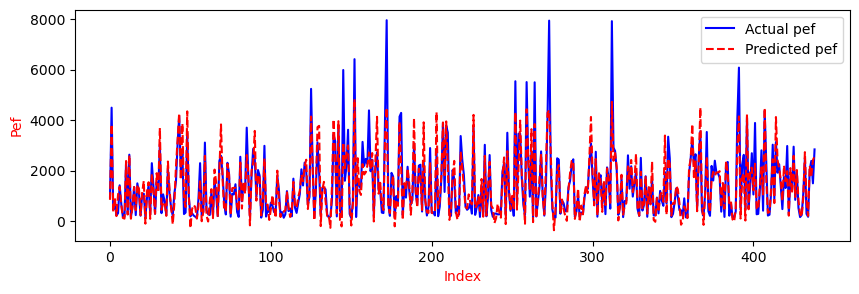

In [472]:
plt.figure(figsize=(10,3))

X = np.arange(len(y_test))
plt.plot(X, y_test, color = "blue", label = "Actual pef")
plt.plot(X, predicted_labels, "r--", label = "Predicted pef")
plt.xlabel("Index", color = "red")
plt.ylabel("Pef", color = "red")
plt.legend(loc = "best")
plt.show()

# Save Model

In [474]:
joblib.dump(model_multiple_linear_regressor["regressor"], path_to_save_model)

['../models/regressor_model.jolib']